In [1]:
# import libraries
import pandas as pd
import pysd
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.cm import get_cmap

In [2]:
# Define folder paths NOTE: Adapt the part before figures to your local file structure
results_folder_path_figures = "/Users/richardgonnheimer/Masterprojekt Vensim/results/figures" # Folder to save results
results_folder_path_csv = "/Users/richardgonnheimer/Masterprojekt Vensim/results/csv" # Folder containing the csv results
model_files_path    = "/Users/richardgonnheimer/Masterprojekt Vensim/Vensim Modelle"       # Folder containing the Vensim models
# Make sure the results folder exists
os.makedirs(results_folder_path_figures, exist_ok=True)
os.makedirs(results_folder_path_csv, exist_ok=True)
#Load Vensim models
original_model= pysd.read_vensim(os.path.join(model_files_path, "wrld3-03 original.mdl"))
new_tables_model = pysd.read_vensim(os.path.join(model_files_path, "wrld3-03 updated pcrum table.mdl")) # Model with updated per capita resource use multiplier table
disaggregated_model = pysd.read_vensim(os.path.join(model_files_path, "wrld3-03 disaggregated.mdl")) # Model with disaggregated nonrenewabl resources
circular_economy_model = pysd.read_vensim(os.path.join(model_files_path, "wrld3-03 circular economy.mdl"))
energy_transition_model = pysd.read_vensim(os.path.join(model_files_path, "wrld3-03 energy transition.mdl"))
full_model = pysd.read_vensim(os.path.join(model_files_path, "wrld3-03 circular economy and energy transition.mdl"))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_lcoe_table_re
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_lcoe_table_re
extrapolating data below the minimum value of the series
  warnings.warn(


In [3]:
original_result = original_model.run()
new_tables_result = new_tables_model.run()
disaggregated_result = disaggregated_model.run()
durs_result = disaggregated_result.copy() #DURS Model is the combination of disaggregated resources and updated resource use table. They do not differ in output values but in model structure.
durs_result["fraction of resources remaining"] = new_tables_result["fraction of resources remaining"] # Adding the aggregated fraction of resources remaining from the new tables model to the DURS result for comparison plots
circular_economy_result = circular_economy_model.run()
energy_transition_result = energy_transition_model.run()
full_result = full_model.run()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_jobs_per_industrial_capital_unit_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_assimilation_half_life_mult_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:96: UserWarning: _hardcodedlookup_persistent_pollution_technology_change_mult_table
extrapolating data above the maximum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:96: UserWarning: _hardcodedlookup_resource_technology_change_mult_table
extrapolating data above the maximum value of the s

In [4]:
# Define variables to plot
results_list = [original_result, durs_result, circular_economy_result, energy_transition_result, full_result]
model_list = ['Base Model', 'DURS Model', 'CE Model', 'ET Model', 'CE & ET Model']
fontsize_title = 15
fontsize_labels = 12
color_map = {
    'Base Model': 'blue',
    'DURS Model': 'magenta',
    'CE Model': 'grey',
    'ET Model': 'green',
    'CE & ET Model': 'red'}

## Single plots (remove comments to create single variable plots)

In [5]:
# # Plot population over time for each model
# plt.figure(figsize=(12, 8))
# for i, result in enumerate(results_list):
#     plt.plot(result.index, result['population'], label=model_list[i])
#     plt.title('Population Over Time',fontsize=fontsize_title)
#     plt.xlabel('Time',fontsize=fontsize_labels)
#     plt.ylabel('Population',fontsize=fontsize_labels)
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
# #plt.savefig(os.path.join(results_folder_path, 'population.png'), dpi=300)
# plt.show()

In [6]:
# # Plotting life expectancy over time for each model
# plt.figure(figsize=(12, 8))
# for i, result in enumerate(results_list):
#     plt.plot(result.index, result['life expectancy'], label=model_list[i])
#     plt.title('Life Expectancy Over Time')
#     plt.xlabel('Time',fontsize=fontsize_labels)
#     plt.ylabel('Life Expectancy',fontsize=fontsize_labels)
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
# #plt.savefig(os.path.join(results_folder_path, 'life_expectancy.png'), dpi=300)
# plt.show()

In [7]:
# # Plotting industrial output over time for each model
# plt.figure(figsize=(12, 8))
# for i, result in enumerate(results_list):
#     plt.plot(result.index, result['industrial output per capita'], label=model_list[i])
#     plt.title('Industrial Output Over Time', fontsize=fontsize_title)
#     plt.xlabel('Time', fontsize=fontsize_labels)
#     plt.ylabel('Industrial Output per Capita', fontsize=fontsize_labels)
#     plt.legend()
#     plt.grid(True)     
#     plt.tight_layout()
# #plt.savefig(os.path.join(results_folder_path, 'industrial_output.png'), dpi=300)
# plt.show()

In [8]:
# # Plotting fraction of industrial capital allocated to obtaining  resources over time for each model
# plt.figure(figsize=(12, 8))
# for i, result in enumerate(results_list):   
#     plt.plot(result.index, result['fraction of industrial capital allocated to obtaining resources'], label=model_list[i])
#     plt.title('Fraction of Industrial Capital Allocated to Obtaining Resources Over Time')
#     plt.xlabel('Time',fontsize=fontsize_labels)
#     plt.ylabel('Fraction of Industrial Capital',fontsize=fontsize_labels)
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
# #plt.savefig(os.path.join(results_folder_path, 'fraction_industrial_capital.png'), dpi=300)
# plt.show()

In [9]:
# # Plotting fraction of material resources remaining over time for each model
# plt.figure(figsize=(12, 8))
# for i, result in enumerate(results_list):
#     if 'fraction of material resources remaining' in result.columns:
#         # Check if the column exists in the result DataFrame
#         plt.plot(result.index, result['fraction of material resources remaining'], label=model_list[i])
#         plt.title('Fraction of Material Resources Remaining Over Time')
#         plt.xlabel('Time',fontsize=fontsize_labels)
#         plt.ylabel('Fraction of Material Resources Remaining',fontsize=fontsize_labels)
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
# #plt.savefig(os.path.join(results_folder_path, 'fraction_material_resources_remaining.png'), dpi=300)
# plt.show()

In [10]:
# # Plotting fraction of energy resources remaining over time for each model
# plt.figure(figsize=(12, 8))
# for i, result in enumerate(results_list):
#     if 'fraction of energy resources remaining' in result.columns:
#         # Check if the column exists in the result DataFrame
#         plt.plot(result.index, result['fraction of energy resources remaining'], label=model_list[i])
#         plt.title('Fraction of Energy Resources Remaining Over Time')
#         plt.xlabel('Time',fontsize=fontsize_labels)
#         plt.ylabel('Fraction of Energy Resources Remaining',fontsize=fontsize_labels)
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
# #plt.savefig(os.path.join(results_folder_path, 'fraction_energy_resources_remaining.png'), dpi=300)
# plt.show()

In [11]:
# # Plotting final fraction of resources remaining over time for each model
# plt.figure(figsize=(12, 8))
# for index, result in enumerate(results_list):
#     if 'fraction of resources remaining' in result.columns:
#         plt.plot(result.index, result['fraction of resources remaining'], label=model_list[index])
#         plt.title('fraction of resources remaining')
#         plt.xlabel('Time',fontsize=fontsize_labels)
#         plt.ylabel('fraction of resources remainingy',fontsize=fontsize_labels)
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
# #plt.savefig(os.path.join(results_folder_path, 'fraction_of_resources_remaining.png'), dpi=300)
# plt.show()

In [12]:
# # Plotting persistent pollution index
# plt.figure(figsize=(12, 8))
# for i, result in enumerate(results_list):
#     if 'persistent pollution index' in result.columns:
#         # Check if the column exists in the result DataFrame
#         plt.plot(result.index, result['persistent pollution index'], label=model_list[i])
#         plt.title('Persistent Pollution Index Over Time')
#         plt.xlabel('Time',fontsize=fontsize_labels)
#         plt.ylabel('Persistent Pollution Index',fontsize=fontsize_labels)
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
# #plt.savefig(os.path.join(results_folder_path, 'persistent_pollution_index.png'), dpi=300)
# plt.show()

In [13]:
# # Plotting human welfare index over time for each model
# plt.figure(figsize=(12, 8))
# for i, result in enumerate(results_list):   
#     if 'Human Welfare Index' in result.columns:
#         # Check if the column exists in the result DataFrame
#         plt.plot(result.index, result['Human Welfare Index'], label=model_list[i])
#         plt.title('Human Welfare Index Over Time')
#         plt.xlabel('Time',fontsize=fontsize_labels)
#         plt.ylabel('Human Welfare Index',fontsize=fontsize_labels)
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
# #plt.savefig(os.path.join(results_folder_path, 'human_welfare_index.png'), dpi=300)
# plt.show()

In [14]:
# # Plotting Arable Land Over Time for each model
# plt.figure(figsize=(12, 8))
# for i, result in enumerate(results_list):
#     if 'Arable Land' in result.columns:
#         # Check if the column exists in the result DataFrame
#         plt.plot(result.index, result['Arable Land'], label=model_list[i])
#         plt.title('Arable Land Over Time')
#         plt.xlabel('Time',fontsize=fontsize_labels)
#         plt.ylabel('Arable Land',fontsize=fontsize_labels)
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
# #plt.savefig(os.path.join(results_folder_path, 'arable_land.png'), dpi=300)
# plt.show()

In [15]:
# # Plotting actual share of RE 
# plt.figure(figsize=(12, 8))
# for index, result in enumerate(results_list):
#     if 'actual share of RE' in result.columns:
#         plt.plot(result.index, result['actual share of RE']*100, label=model_list[index], linewidth=2, color=color_map[model_list[index]])
#         plt.title('Actual Share of Renewable Energy Over Time', fontsize=fontsize_title)
#         plt.xlabel('Time', fontsize=fontsize_title)
#         plt.ylabel('Actual Share of Renewable Energy [%]', fontsize=fontsize_title)
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
# #plt.savefig(os.path.join(results_folder_path, 'actual_share_of_RE.png'), dpi=300)
# plt.show()

In [16]:
# # Plotting RE capacity extension over time for each model
# plt.figure(figsize=(12, 8))
# for index, result in enumerate(results_list):
#     if 'RE capacity extension' in result.columns:
#         plt.plot(result.index, result['RE capacity extension'], label=model_list[index], linewidth=2, color=color_map[model_list[index]])
#         plt.title('RE capacity extension over time', fontsize=fontsize_title)
#         plt.xlabel('Time', fontsize=fontsize_title)
#         plt.ylabel('RE capacity extension [TW/a]', fontsize=fontsize_title)
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
# #plt.savefig(os.path.join(results_folder_path, 'RE_capacity_extension.png'), dpi=300)
# plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


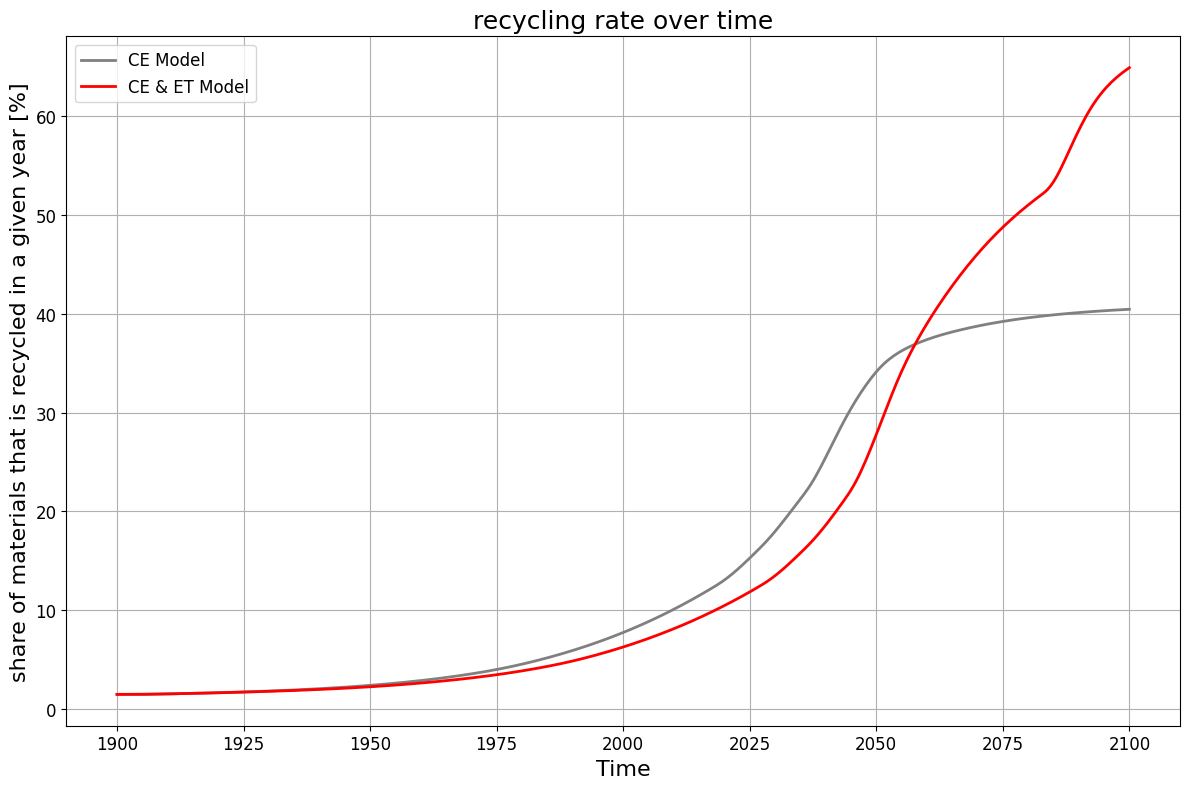

In [ ]:
# # Plotting recycling rate over time for each model
plt.figure(figsize=(12, 8))
for index, result in enumerate(results_list):
    if 'recycling rate' in result.columns:
        plt.plot(result.index, result['recycling rate']*100, label=model_list[index], linewidth=2, color=color_map[model_list[index]])
        plt.title('recycling rate over time', fontsize=18)
        plt.xlabel('Time', fontsize=16)
        plt.ylabel('share of materials that is recycled in a given year [%]', fontsize=16)
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
plt.savefig(os.path.join(results_folder_path_figures, 'Figure4_recycling_rate.pdf'))
plt.savefig(os.path.join(results_folder_path_figures, 'Figure4_recycling_rate.eps'))
plt.show()

In [59]:
# Save recycling rate data to CSV
df_recycling = pd.DataFrame({
    model_list[i]: results_list[i]['recycling rate'] * 100
    for i in range(len(model_list))
    if 'recycling rate' in results_list[i].columns
})

# CSV-Datei speichern
csv_path = os.path.join(results_folder_path_csv, 'figure_4.csv')
df_recycling.to_csv(csv_path, index=True)

print("Saved:", csv_path)

Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/figure_4.csv


## Combined plots for Article

In [19]:
fontsize_labels_title_article = 16
fontsize_legend_ticks_article = 14

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


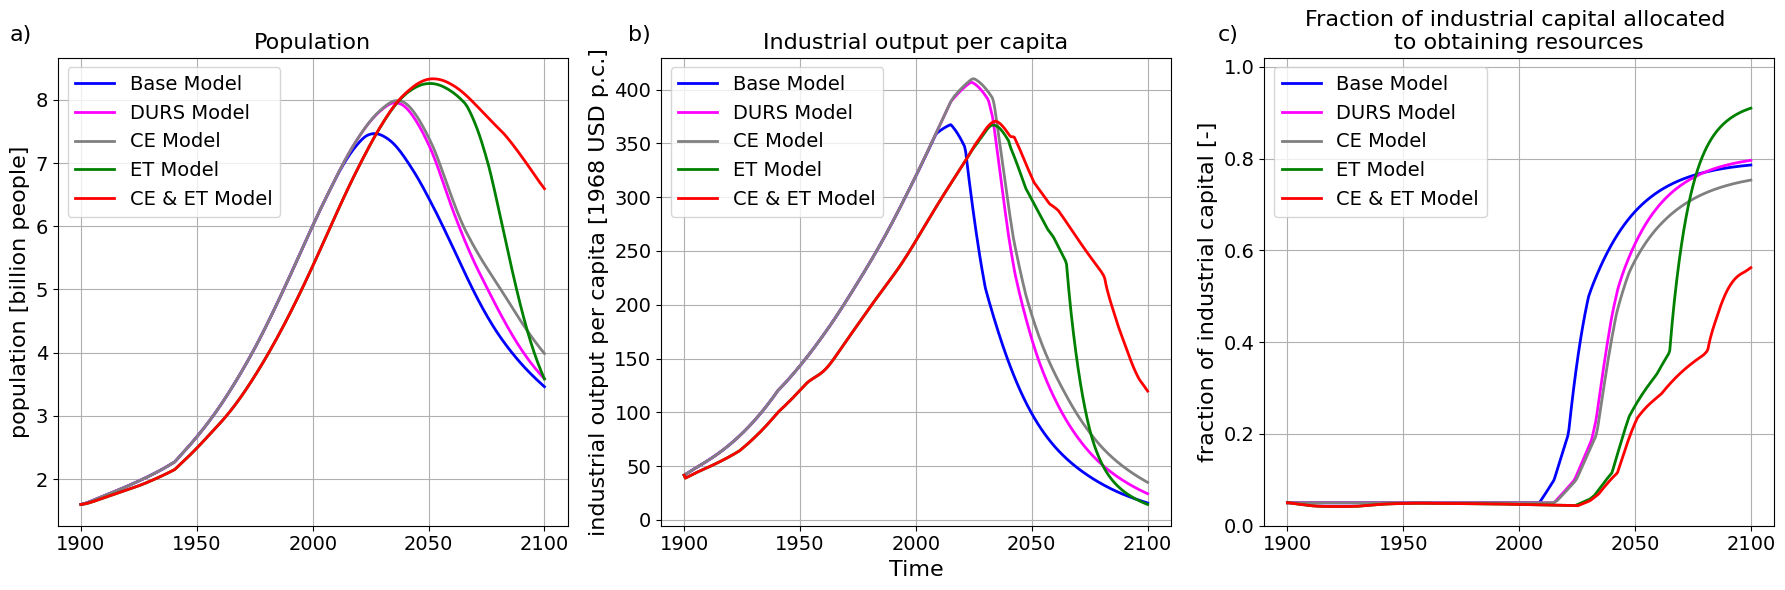

In [ ]:
# 3 Subplots next to each other: population, industrial output per capita, fraction of industrial capital allocated to obtaining resources
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)
#fig.suptitle('\nComparison of population and industrial output/capital over time', fontsize=20, y=1.01)

# 1) population
ax = axes[0]
for index, result in enumerate(results_list):
    if 'population' in result.columns:
        ax.plot(result.index, result['population']/1e9, label=model_list[index], linewidth=2, color=color_map[model_list[index]])
ax.set_title('Population', fontsize=fontsize_labels_title_article)
#ax.set_xlabel('Time', fontsize=fontsize_labels)
ax.set_ylabel('population [billion people]', fontsize=fontsize_labels_title_article)
ax.legend(fontsize=fontsize_legend_ticks_article)
ax.grid(True)
ax.text(-0.05, 1.07, 'a)', transform=ax.transAxes,
        fontsize=16, fontweight='light', va='top', ha='right')

# 2) industrial output per capita
ax = axes[1]
for i, result in enumerate(results_list):
    if 'industrial output per capita' in result.columns:
        ax.plot(result.index, result['industrial output per capita'], label=model_list[i], linewidth=2, color=color_map[model_list[i]])
ax.set_title('Industrial output per capita', fontsize=fontsize_labels_title_article)
ax.set_xlabel('Time', fontsize=fontsize_labels_title_article)
ax.set_ylabel('industrial output per capita [1968 USD p.c.]', fontsize=fontsize_labels_title_article)
ax.legend(fontsize=fontsize_legend_ticks_article)
ax.grid(True)
ax.text(-0.02, 1.07, 'b)', transform=ax.transAxes,
        fontsize=16, fontweight='light', va='top', ha='right')

# 3) fraction of industrial capital allocated to obtaining resources
ax = axes[2]
for i, result in enumerate(results_list):
    if 'fraction of industrial capital allocated to obtaining resources' in result.columns:
        ax.plot(result.index, result['fraction of industrial capital allocated to obtaining resources'], label=model_list[i], linewidth=2, color=color_map[model_list[i]])
ax.set_title('Fraction of industrial capital allocated \nto obtaining resources', fontsize=fontsize_labels_title_article)
#ax.set_xlabel('Time', fontsize=fontsize_labels)
ax.set_ylabel('fraction of industrial capital [-]', fontsize=fontsize_labels_title_article)
ax.legend(fontsize=fontsize_legend_ticks_article)
ax.grid(True)
ax.set_ylim(0, 1.02)
ax.text(-0.05, 1.07, 'c)', transform=ax.transAxes,
        fontsize=16, fontweight='light', va='top', ha='right')

for ax in axes:
        ax.tick_params(axis="y",labelsize=fontsize_legend_ticks_article)
        ax.tick_params(axis="x",labelsize=fontsize_legend_ticks_article)

plt.tight_layout()
plt.savefig(os.path.join(results_folder_path_figures, 'Figure6_population_capital_allocated.pdf'), dpi=300)
plt.savefig(os.path.join(results_folder_path_figures, 'Figure6_population_capital_allocated.eps'), dpi=300)
plt.show()

In [58]:
# Save plot data as CSV files
plot_vars = {
    "population": lambda s: s / 1e9,  # Billions like in the plot
    "industrial output per capita": lambda s: s,
    "fraction of industrial capital allocated to obtaining resources": lambda s: s,
}
subplotletters = {var: letter for var, letter in zip(plot_vars, ['a', 'b', 'c', 'd'])}

dfs_by_variable = {}
for var, transform in plot_vars.items():
    series_by_model = {}
    for i, result in enumerate(results_list):
        model = model_list[i]
        if var in result.columns:
            series_by_model[model] = transform(result[var])

    df_var = pd.DataFrame(series_by_model)
    df_var.index.name = "time"
    dfs_by_variable[var] = df_var

    # save as csv
    safe_name = "figure_6" + subplotletters[var]
    out_path = os.path.join(f"{safe_name}.csv")
    df_var.to_csv(out_path)
    print("Saved:", out_path)

Saved: figure_6a.csv
Saved: figure_6b.csv
Saved: figure_6c.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


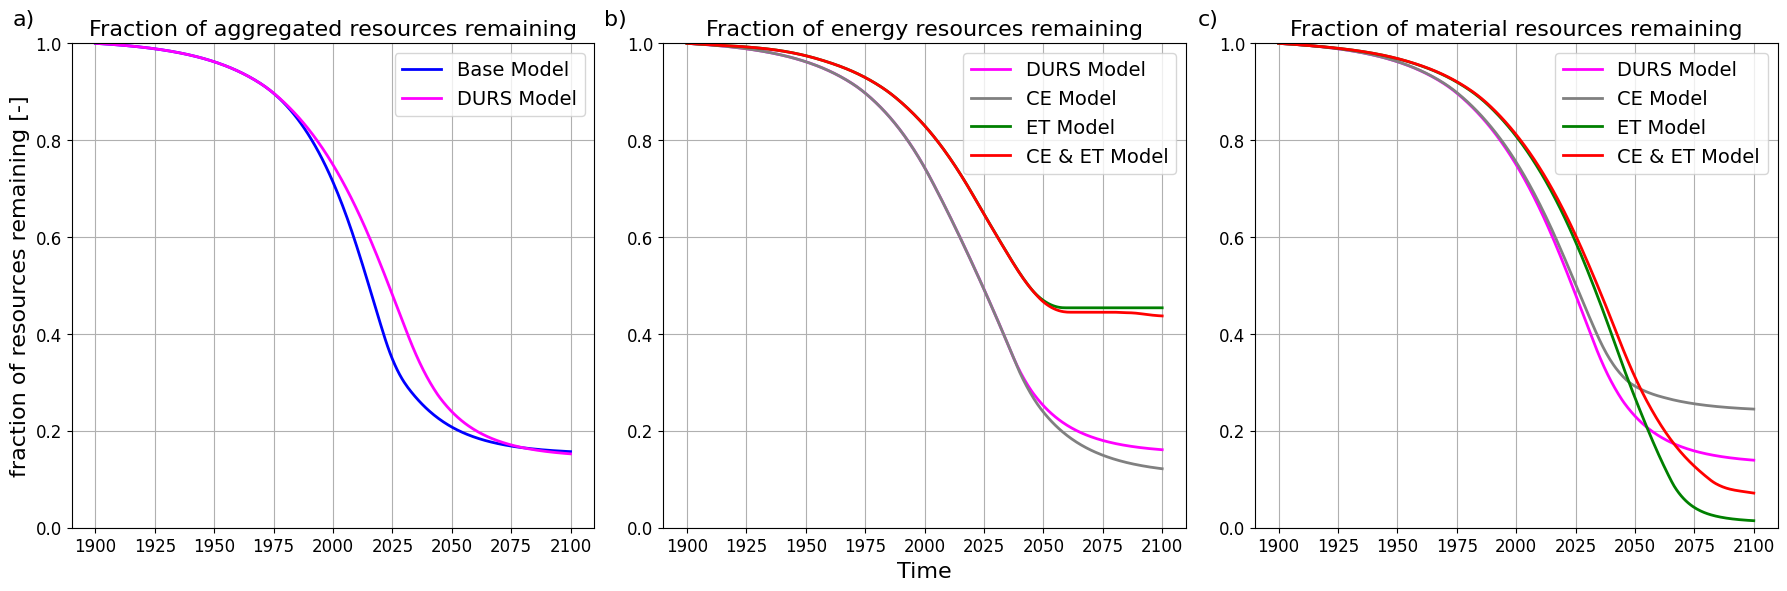

In [ ]:
# 3 Subplots next to each other: fraction of resources remaining, fraction of energy resources remaining, fraction of material resources remaining
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)
#fig.suptitle('\nComparison of resource depletion over time', fontsize=18, y=1.01)
# 1) fraction of resources remaining
ax = axes[0]
for index, result in enumerate(results_list):
    if 'fraction of resources remaining' in result.columns:
        ax.plot(result.index, result['fraction of resources remaining'], label=model_list[index], linewidth=2, color=color_map[model_list[index]])
ax.set_title('Fraction of aggregated resources remaining', fontsize=fontsize_labels_title_article)
#ax.set_xlabel('Time', fontsize=fontsize_labels)
ax.set_ylabel('fraction of resources remaining [-]', fontsize=fontsize_labels_title_article)
ax.legend(fontsize=fontsize_legend_ticks_article)
ax.grid(True)
ax.set_ylim(0,1)
ax.text(-0.07, 1.07, 'a)', transform=ax.transAxes,
        fontsize=16, fontweight='light', va='top', ha='right')

# 2) fraction of energy resources remaining
ax = axes[1]
for i, result in enumerate(results_list):
    if 'fraction of energy resources remaining' in result.columns:
        ax.plot(result.index, result['fraction of energy resources remaining'], label=model_list[i], linewidth=2, color=color_map[model_list[i]])
ax.set_title('Fraction of energy resources remaining', fontsize=fontsize_labels_title_article)
ax.set_xlabel('Time', fontsize=fontsize_labels_title_article)
#ax.set_ylabel('Fraction of Energy Resources Remaining', fontsize=fontsize_labels)
ax.legend(fontsize=fontsize_legend_ticks_article)
ax.grid(True)
ax.set_ylim(0,1)
ax.text(-0.07, 1.07, 'b)', transform=ax.transAxes,
        fontsize=16, fontweight='light', va='top', ha='right')

# 3) fraction of material resources remaining
ax = axes[2]
for i, result in enumerate(results_list):
    if 'fraction of material resources remaining' in result.columns:
        ax.plot(result.index, result['fraction of material resources remaining'], label=model_list[i], linewidth=2, color=color_map[model_list[i]])
ax.set_title('Fraction of material resources remaining',   fontsize=fontsize_labels_title_article)
#ax.set_xlabel('Time', fontsize=fontsize_labels)
#ax.set_ylabel('Fraction of Material Resources Remaining', fontsize=fontsize_labels)
ax.legend(fontsize=fontsize_legend_ticks_article)
ax.grid(True)
ax.set_ylim(0,1)
ax.text(-0.07, 1.07, 'c)', transform=ax.transAxes,
        fontsize=16, fontweight='light', va='top', ha='right')

for ax in axes:
        ax.tick_params(axis="y",labelsize=12)
        ax.tick_params(axis="x",labelsize=12)



plt.tight_layout()
plt.savefig(os.path.join(results_folder_path_figures, 'Figure7_resources_overview.pdf'), dpi=300)
plt.savefig(os.path.join(results_folder_path_figures, 'Figure7_resources_overview.eps'), dpi=300)
plt.show()


In [57]:
# Save plot data as CSV files (resources overview)
plot_vars = {
    "fraction of resources remaining": lambda s: s,
    "fraction of energy resources remaining": lambda s: s,
    "fraction of material resources remaining": lambda s: s,
}
subplotletters = {var: letter for var, letter in zip(plot_vars, ['a', 'b', 'c', 'd'])}

dfs_by_variable_resources = {}
for var, transform in plot_vars.items():
    series_by_model = {}
    for i, result in enumerate(results_list):
        model = model_list[i]
        if var in result.columns:
            series_by_model[model] = transform(result[var])

    df_var = pd.DataFrame(series_by_model)
    df_var.index.name = "time"
    dfs_by_variable_resources[var] = df_var

    # save as csv
    safe_name = "figure_7" + subplotletters[var]
    out_path = os.path.join(f"{safe_name}.csv")
    df_var.to_csv(out_path)
    print("Saved:", out_path)

Saved: figure_7a.csv
Saved: figure_7b.csv
Saved: figure_7c.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


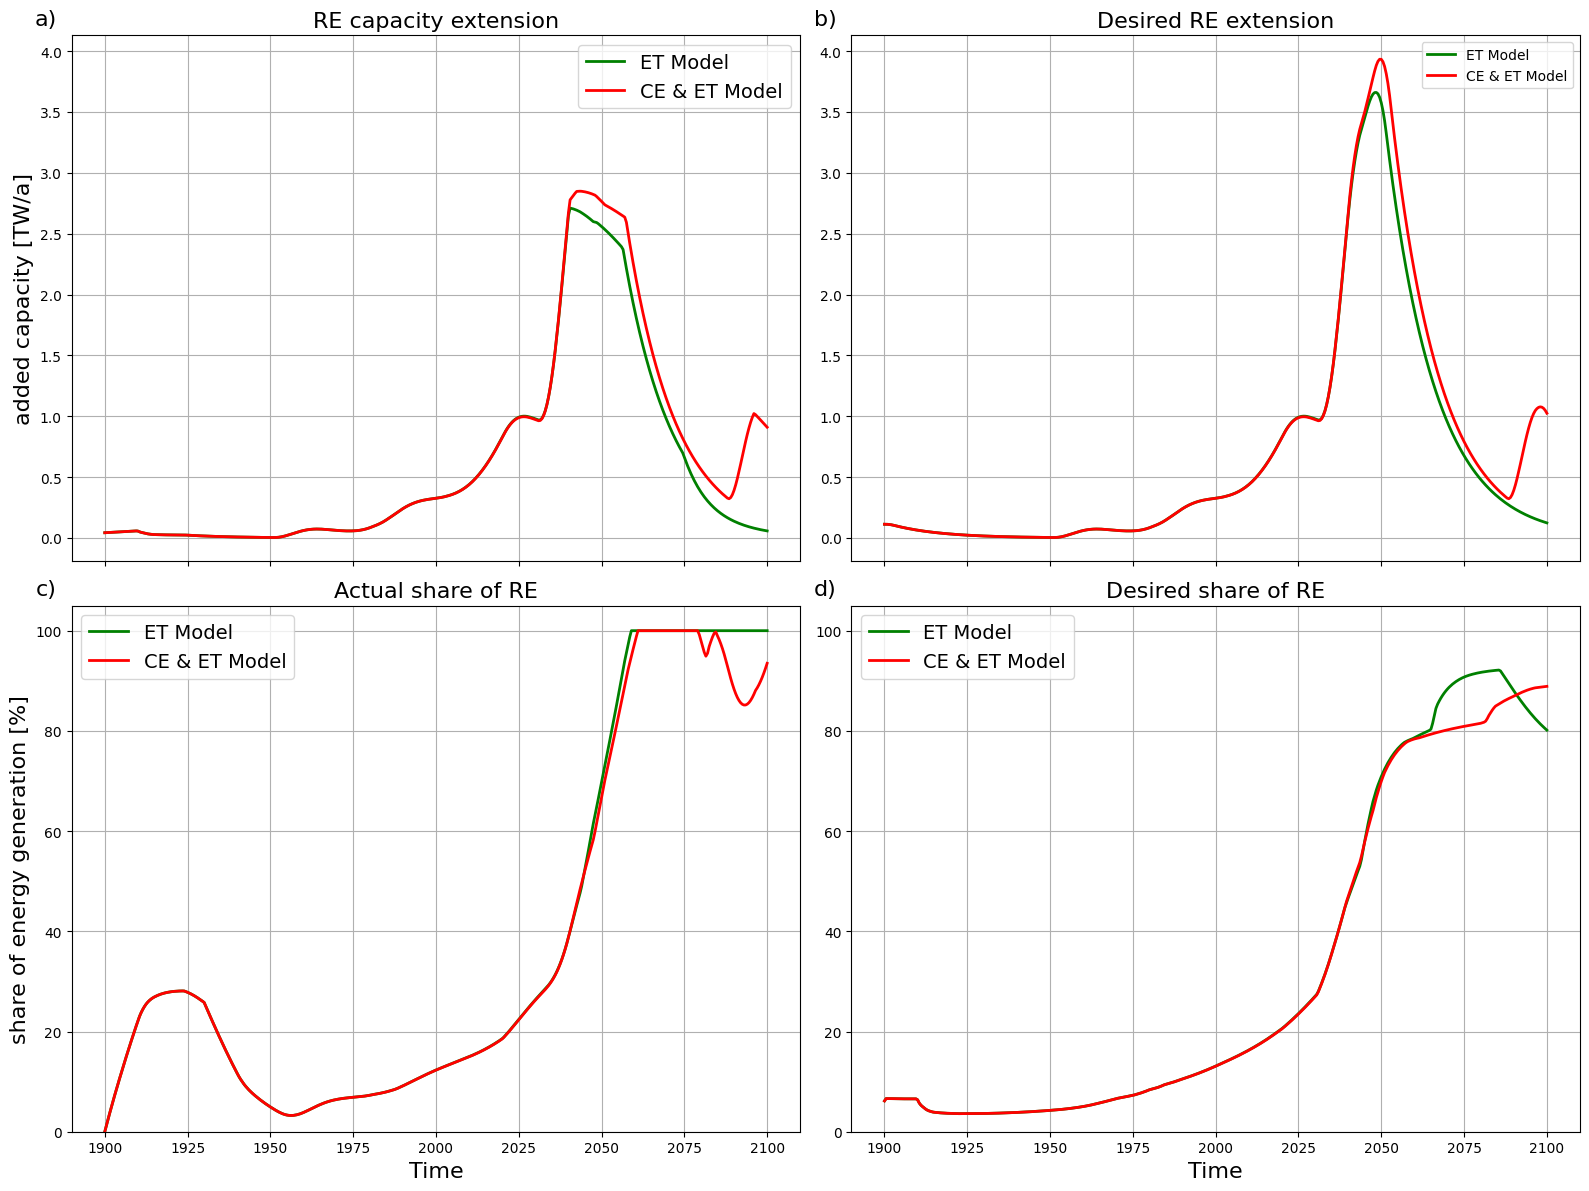

In [ ]:
# Create figure with 4 subplots side by side: RE capacity extension, desired RE extension, actual share of RE, desired share of RE
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
#fig.suptitle('\nRE extension overview', fontsize=20, y=1.0)
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier indexing
fontsize_title = 14  # adjust as needed

# 2) Desired RE extension
ax = axes[1]
for index, result in enumerate(results_list):
    if 'desired RE extension' in result.columns:
        ax.plot(result.index, result['desired RE extension'],
                label=model_list[index], linewidth=2, color=color_map[model_list[index]])
ax.set_title('Desired RE extension', fontsize=fontsize_labels_title_article)
#ax.set_xlabel('Time', fontsize=fontsize_title)
#ax.set_ylabel('Capacity [TW/a]', fontsize=fontsize_title)
ax.legend()
ax.grid(True)
ax.text(-0.02, 1.05, 'b)', transform=ax.transAxes,
        fontsize=16, fontweight='light', va='top', ha='right')
ylim_desired =ax.get_ylim() #get ylim to use for plot 1

# 1) RE capacity extension
ax = axes[0]
for index, result in enumerate(results_list):
    if 'RE capacity extension' in result.columns:
        ax.plot(result.index, result['RE capacity extension'],
                label=model_list[index], linewidth=2, color=color_map[model_list[index]])
ax.set_title('RE capacity extension', fontsize=fontsize_labels_title_article)
#ax.set_xlabel('Time', fontsize=fontsize_title)
ax.set_ylabel('added capacity [TW/a]', fontsize=fontsize_labels_title_article)
ax.legend(fontsize=fontsize_legend_ticks_article)
ax.grid(True)
ax.text(-0.02, 1.05, 'a)', transform=ax.transAxes,
        fontsize=16, fontweight='light', va='top', ha='right')
ax.set_ylim(ylim_desired) # set same ylim as plot 2

# 3) Actual share of RE
ax = axes[2]
for index, result in enumerate(results_list):
    if 'actual share of RE' in result.columns:
        ax.plot(result.index, result['actual share of RE']*100,
                label=model_list[index], linewidth=2, color=color_map[model_list[index]])
ax.set_title('Actual share of RE', fontsize=fontsize_labels_title_article)
ax.set_xlabel('Time', fontsize=fontsize_labels_title_article)
ax.set_ylabel('share of energy generation [%]', fontsize=fontsize_labels_title_article)
ax.legend(fontsize=fontsize_legend_ticks_article)
ax.grid(True)
ax.text(-0.02, 1.05, 'c)', transform=ax.transAxes,
        fontsize=16, fontweight='light', va='top', ha='right')
ax.set_ylim(0, 105)

# 4) Desired share of RE
ax = axes[3]
for index, result in enumerate(results_list):
    if 'desired share of RE' in result.columns:
        ax.plot(result.index, result['desired share of RE']*100,
                label=model_list[index], linewidth=2, color=color_map[model_list[index]])
ax.set_title('Desired share of RE', fontsize=fontsize_labels_title_article)
ax.set_xlabel('Time', fontsize=fontsize_labels_title_article)
#ax.set_ylabel('Share [%]', fontsize=fontsize_labels_title_article)
ax.legend(fontsize=fontsize_legend_ticks_article)
ax.grid(True)
ax.text(-0.02, 1.05, 'd)', transform=ax.transAxes,
        fontsize=16, fontweight='light', va='top', ha='right')
ax.set_ylim(0, 105)

# # 5) Accumulated RE capacity
# ax = axes[3]
# for index, result in enumerate(results_list):
#     if 'accumulated RE capacity' in result.columns:
#         ax.plot(result.index, result['accumulated RE capacity'],
#                 label=model_list[index], linewidth=2, color=color_map[model_list[index]])
# ax.set_title('Accumulated RE Capacity', fontsize=fontsize_title)
# ax.set_xlabel('Time', fontsize=fontsize_title)
# ax.set_ylabel('Capacity [TW]', fontsize=fontsize_title)
# ax.legend()
# ax.grid(True)

# Adjust layout and save
plt.tight_layout()
plt.savefig(os.path.join(results_folder_path_figures, 'Figure5_RE_extension_overview.pdf'), dpi=300)
plt.savefig(os.path.join(results_folder_path_figures, 'Figure5_RE_extension_overview.eps'), dpi=300)
plt.show()

In [56]:
# Save plot data as CSV files (RE extension overview)
plot_vars = {
    "RE capacity extension": lambda s: s,
    "desired RE extension": lambda s: s,
    "actual share of RE": lambda s: s * 100,   # wie im Plot: %
    "desired share of RE": lambda s: s * 100,  # wie im Plot: %
}
subplotletters = {var: letter for var, letter in zip(plot_vars, ['a', 'b', 'c', 'd'])}

dfs_by_variable_re = {}

for var, transform in plot_vars.items():
    series_by_model = {}
    for i, result in enumerate(results_list):
        model = model_list[i]
        if var in result.columns:
            series_by_model[model] = transform(result[var])

    df_var = pd.DataFrame(series_by_model)
    df_var.index.name = "time"

    dfs_by_variable_re[var] = df_var

    # save as csv
    safe_name = "figure_5" + subplotletters[var]
    out_path = os.path.join(f"{safe_name}.csv")
    df_var.to_csv(out_path)
    print("Saved:", out_path)

Saved: figure_5a.csv
Saved: figure_5b.csv
Saved: figure_5c.csv
Saved: figure_5d.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


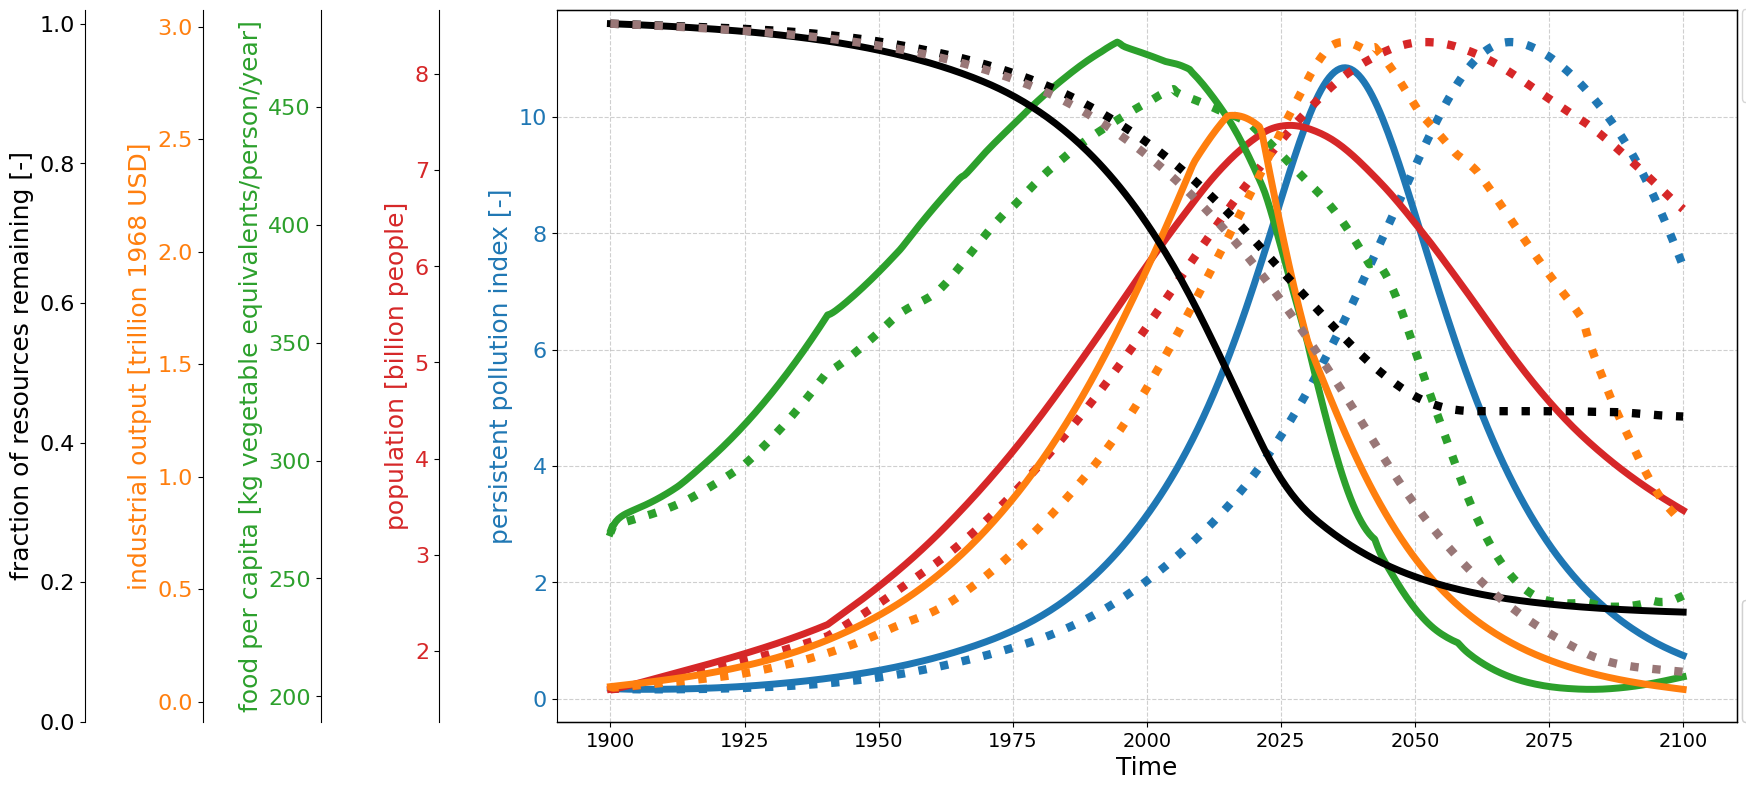

In [ ]:
# Seclect DataFrames (Base vs. CE+ET)
selected_results = [results_list[0], results_list[-1]]
selected_labels  = [model_list[0],   model_list[-1]]

# Variables to plot
variables = [
    "persistent pollution index",
    "population",
    "food per capita",
    "industrial output",
    "resources remaining (combined)"  # Placeholder for the combined resources plot
]

# Colors for variables/components
colors = {
    "persistent pollution index": "tab:blue",
    "population": "tab:red",
    "food per capita": "tab:green",
    "industrial output": "tab:orange",
    # Resource components (grayscale)
    "resources_total": "#000000",    # black
    "resources_material": "#997777",  # slightly reddish
    "resources_energy": "#000000",   # dark gray

}

# Linestyles for models
linestyles = {
    model_list[0]: "-",   # Base (solid)
    model_list[-1]: ":",  # CE+ET (dotted)
}
line_widths = {
    model_list[0]: 5,   # Base
    model_list[-1]: 6,  # CE+ET
}

# Scaling + Units
scale_div = {
    "population": 1e9,              # -> billions
    "industrial output": 1e12,      # -> trillions
}
unit_suffix = {
    "population": " [billion people]",
    "industrial output": " [trillion 1968 USD]",
    "food per capita": " [kg vegetable equivalents/person/year]",
    "persistent pollution index": " [-]",
}

plt.figure(figsize=(20, 8))
ax = plt.gca()
axes = {}

# Multiple y-axes
for i, var in enumerate(variables):
    if i == 0:
        ax_var = ax
    else:
        ax_var = ax.twinx()
        ax_var.spines["left"].set_position(("axes", -0.1 * i))
        ax_var.spines["left"].set_visible(True)
        ax_var.yaxis.set_label_position("left")
        ax_var.yaxis.set_ticks_position("left")
    axes[var] = ax_var

# Plot each variable for both selected models
for result, label in zip(selected_results, selected_labels):
    for var in variables:
        ax_var = axes[var]
        lw = line_widths[label]
        ls = linestyles[label]
        #special case for resources remaining (combined)
        if var == "resources remaining (combined)":
            
            if "fraction of resources remaining" in result.columns:
                ax_var.plot(
                    result.index,
                    result["fraction of resources remaining"],
                    linestyle=ls,
                    color=colors["resources_total"],
                    linewidth=lw,
                    label=f"{label}: total"
                )
            # CE+ET: Energy + Material
            if "fraction of energy resources remaining" in result.columns:
                ax_var.plot(
                    result.index,
                    result["fraction of energy resources remaining"],
                    linestyle=ls,
                    color=colors["resources_energy"],
                    linewidth=lw,
                    label=f"{label}: energy"
                )
            if "fraction of material resources remaining" in result.columns:
                ax_var.plot(
                    result.index,
                    result["fraction of material resources remaining"],
                    linestyle=ls,
                    color=colors["resources_material"],
                    linewidth=lw,
                    label=f"{label}: material"
                )
        else:
            # Other variables plotted directly
            if var in result.columns:
                series = result[var]
                if var in scale_div:
                    series = series / scale_div[var]
                ax_var.plot(
                    result.index,
                    series,
                    linestyle=ls,
                    color=colors[var],
                    linewidth=lw,
                )

# Set labels, titles, legends
for var, ax_var in axes.items():
    if var == "resources remaining (combined)":
        ax_var.set_ylabel("fraction of resources remaining [-]", fontsize=18, color="black")
        ax_var.tick_params(axis="y", labelcolor="black", labelsize=16)
        ax_var.set_ylim(0, 1.02)
    else:
        ylabel = var + unit_suffix.get(var, "")
        ax_var.set_ylabel(ylabel, fontsize=18, color=colors.get(var, "black"))
        ax_var.tick_params(axis="y", labelcolor=colors.get(var, "black"), labelsize=16)

ax.set_xlabel('Time', fontsize=18)
#ax.set_title("State of the World: Base Model vs. CE & ET Model", fontsize=20, y=1.05)
ax.grid(True, which="both", linestyle="--", alpha=0.6)

# Two legends: (1) Models (linestyles), (2) Resource components (colors)
model_handles = [
    Line2D([0], [0], color="grey", linestyle=linestyles[model_list[0]], linewidth=8, label=model_list[0]),
    Line2D([0], [0], color="grey", linestyle=linestyles[model_list[-1]], linewidth=8, label=model_list[-1]),
]
component_handles = [
    Line2D([0], [0], color=colors["resources_total"], linestyle="-", linewidth=8, label="Total (Base)",alpha=0.9),
    Line2D([0], [0], color=colors["resources_energy"], linestyle=":", linewidth=8, label="Energy (CE & ET)"),
    Line2D([0], [0], color=colors["resources_material"], linestyle=":", linewidth=8, label="Material (CE & ET)"),
]
ax.tick_params(axis="x",labelsize=14)
# Place legends
leg1 = ax.legend(handles=model_handles, title="Models", loc="upper right", bbox_to_anchor=(1.20, 1.015), fontsize=14, title_fontsize=16, handlelength=2.45)
ax.add_artist(leg1)
leg2 = ax.legend(handles=component_handles, title="Resource components", loc="lower right", bbox_to_anchor=(1.235, -0.014), fontsize=14, title_fontsize=16,handlelength=2.45)
ax.add_artist(leg2)

plt.tight_layout()
plt.subplots_adjust(left=0.275, right=0.865, top=0.99, bottom=0.1)
plt.savefig(os.path.join(results_folder_path_figures, "Figure3_world3_signature_plot.pdf"), dpi=300)
plt.savefig(os.path.join(results_folder_path_figures, "Figure3_world3_signature_plot.eps"), dpi=300)
plt.show()

In [55]:
# --- Save plotted data to CSV
selected_results = [results_list[0], results_list[-1]]
selected_labels  = [model_list[0], model_list[-1]]

# Variables used in the plot (including the combined resources placeholder)
variables = [
    "persistent pollution index",
    "population",
    "food per capita",
    "industrial output",
    "resources remaining (combined)"
]

# Mapping of combined resources placeholder to actual dataframe columns
resource_component_names = {
    "resources_total": "fraction of resources remaining",
    "resources_energy": "fraction of energy resources remaining",
    "resources_material": "fraction of material resources remaining"
}

# Collect series into a dict keyed by (variable_or_component, model_name)
data = {}

# Iterate selected models and variables, filling the dict with Series
for result, model in zip(selected_results, selected_labels):
    for var in variables:
        if var == "resources remaining (combined)":
            # add each resource component separately if present
            for comp_key, col_name in resource_component_names.items():
                if col_name in result.columns:
                    data[(comp_key, model)] = result[col_name]
        else:
            # add normal variable if present
            if var in result.columns:
                data[(var, model)] = result[var]

# If nothing matched, raise an error to avoid saving an empty CSV silently
if not data:
    raise RuntimeError("No matching columns found in the provided result DataFrames. Check column names.")

# Concatenate all Series side-by-side -> DataFrame with MultiIndex columns
df_all = pd.concat(data, axis=1)

# Label the column index levels for clarity
df_all.columns.names = ["variable", "model"]

# Name the index (time)
df_all.index.name = "time"

# Output filename (safe name)
out_name = "figure_3.csv"
out_path = os.path.join(results_folder_path_csv, out_name)

# Save to CSV (MultiIndex columns are written as repeated header rows)
df_all.to_csv(out_path)

print("Saved combined CSV with MultiIndex columns to:", out_path)

Saved combined CSV with MultiIndex columns to: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/figure_3.csv


# Sensitivity Analysis

In [28]:
# Sensitivity analysis for CE & ET Model

#Material intensity of RE: RE extension material intensity Value = 7.5e+08 (resource units per TW)

#Cost intensity of RE machen via: RE integration cost factor Vert = 1.4 (dmnl)

#Energy intensity of Recycling: energy consumption by recycling reference Value = 320 (TWh/Garbage from 1970)

In [29]:
# Sensitivity Analysis is conducted for the full model (CE & ET) only
# Define factors by which results chosen for certain parameters are multiplied in order to conduct the sensitivity analysis
factors_for_sensitivity_analysis = [0, 0.25, 0.5, 0.8, 0.9, 1.0,1.1,1.25,1.5, 1.75, 2.0, 3.0, 4.0, 5.0]
# Define the values that have been chosen in the Vensim Models the parameters for which sensitivity of the model behaviour is tested
material_intensity_standard_value = 7.5e+08  # resource units per TW
re_integration_cost_factor_standard_value = 1.4  # dmnl
recycling_energy_consumption_standard_value = 320  # TWh/allWaste from 1970

## Material intensity of RE

In [30]:
#Change fontsizes for the bigger plots in sensitivity analysis
fontsize_sensitivity = 18
fontsize_legend_sensitivity = 16

In [31]:
# Define the variables that are plotted for each sensitivity analysis
variables = [
    'industrial output',
    'population',
    'fraction of energy resources remaining',
    'fraction of material resources remaining']

In [32]:
#Run the model once for each factor, store results for all variables
results_by_factor_mat = {}
for factor in factors_for_sensitivity_analysis:
    material_intensity = material_intensity_standard_value * factor
    results_by_factor_mat[factor] = full_model.run(
        params={'RE extension material intensity': material_intensity},
        return_columns=variables
    )

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_lcoe_table_re
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_assimilation_half_life_mult_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_jobs_per_industrial_capital_unit_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_capacity_utilization_fraction_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Fram

In [33]:
# Version with more variables
# variables = [
#     'RE capacity extension',
#     'actual share of RE',
#     'persistent pollution index',
#     'fraction of energy resources remaining',
#     'fraction of material resources remaining',
#     'fraction of industrial capital allocated to obtaining resources',
#     'industrial output',
#     'population',
#     'life expectancy']

# n_vars = len(variables)
# fig, axes = plt.subplots(5, 2, figsize=(20, 30), sharex=True)
# axes = axes.flatten()  
# # Run the model once for each factor, store results for all variables
# results_by_factor = {}
# for factor in factors_for_sensitivity_analysis:
#     material_intensity = material_intensity_standard_value * factor
#     results_by_factor[factor] = extendable_1stock.run(
#         params={'RE extension material intensity': material_intensity},
#         return_columns=variables
#     )

# # Now plot each variable for all factors
# for ax, var in zip(axes, variables):
#     for factor in factors_for_sensitivity_analysis:
#         result = results_by_factor_mat[factor]
#         if factor == 1:
#             ax.plot(result.index, result[var], label=f'Factor = {factor}', linewidth=4)
#         else:
#             ax.plot(result.index, result[var], label=f'Factor = {factor}', linestyle=':', linewidth=3)
#     ax.set_title(var)
#     ax.set_ylabel(var)
#     ax.grid(True)
#     ax.legend()

# plt.title('Sensitivity Analysis of Extendable 1 Stock Model with Varying RE Extension Material Intensity Factors')
# axes[-1].set_xlabel('Time')
# fig.delaxes(axes[-1])  # Remove the last empty subplot if not needed
# plt.tight_layout()
# plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


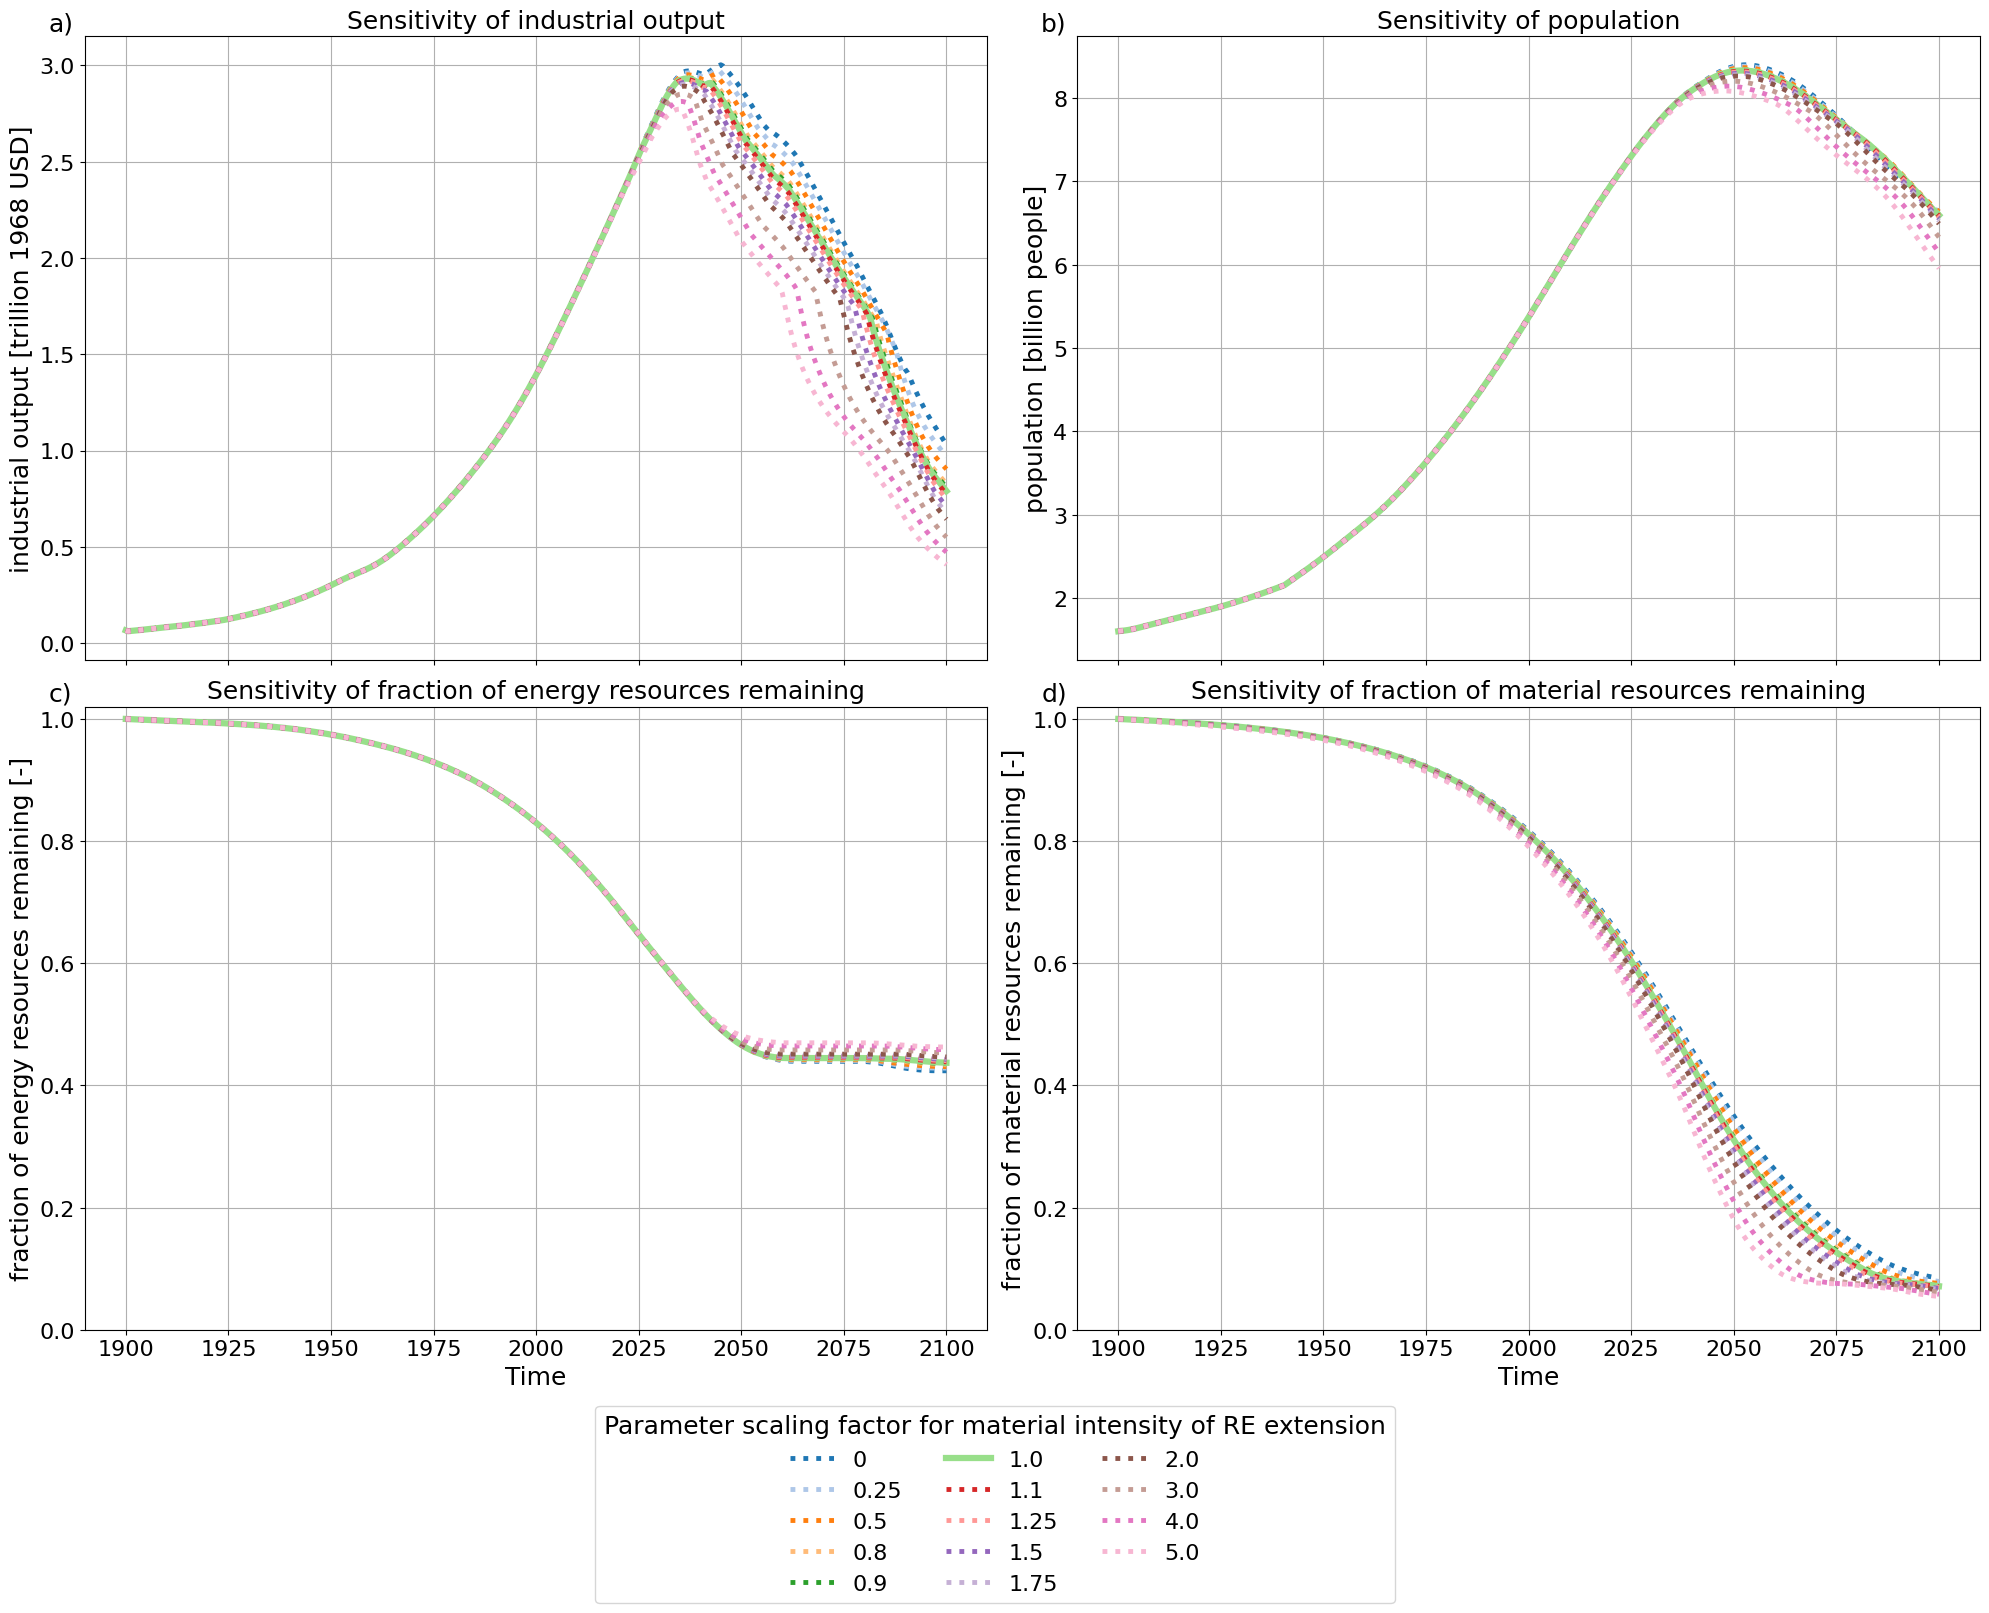

In [ ]:
# Plot for 4 variables for article
variables = [
    'industrial output',
    'population',
    'fraction of energy resources remaining',
    'fraction of material resources remaining'
]

fig, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=True)
#fig.suptitle(
##    '\nSensitivity analysis of CE & ET model with varying Material intensity of RE extension',
 #   fontsize=18, y=1.01
#)
axes = axes.flatten()

# Scaling factors and labels
scale_div = {
    'population': 1e9,             # -> billions
    'industrial output': 1e12      # -> trillions
}
unit_suffix = {
    'population': ' [billion people]',
    'industrial output': ' [trillion 1968 USD]',
    'fraction of energy resources remaining': ' [-]',
    'fraction of material resources remaining': ' [-]'
}
letters = ['a)', 'b)', 'c)', 'd)']

# Extend colormap to prevent repeating colors
cmap = plt.get_cmap("tab20")
colors = [cmap(i) for i in range(len(factors_for_sensitivity_analysis))]

# Collect handles/labels for single legend
handles, labels = [], []

# Plot
for ax, var in zip(axes, variables):
    for idx, factor in enumerate(factors_for_sensitivity_analysis):
        result = results_by_factor_mat[factor]
        series = result[var]
        # Scaling if defined
        if var in scale_div:
            series = series / scale_div[var]
        # Plot lines
        if factor == 1:
            line, = ax.plot(result.index, series,
                            label=f'factor = {factor}',
                            linewidth=4.5, color=colors[idx])
        else:
            line, = ax.plot(result.index, series,
                            label=f'factor = {factor}',
                            linestyle=':', linewidth=3.5, color=colors[idx])
        
        if f'{factor}' not in labels:
            handles.append(line)
            labels.append(f'{factor}')
    
    # Titles in sentence case
    ax.set_title(f"Sensitivity of {var}", fontsize=fontsize_sensitivity)
    # y-label sentence case
    ax.set_ylabel(f"{var}{unit_suffix.get(var, '')}", fontsize=fontsize_sensitivity)
    ax.tick_params(axis="y",labelsize=fontsize_legend_sensitivity)
    ax.grid(True)
    ax.text(-0.04, 1.04, letters[axes.tolist().index(ax)],
            transform=ax.transAxes, fontsize=fontsize_sensitivity, fontweight='light', va='top')
    if var.startswith('fraction of'):
        ax.set_ylim(0, 1.02)

# X-axes
for ax in axes[-2:]:
    ax.set_xlabel('Time', fontsize=fontsize_sensitivity)
    ax.tick_params(axis="x", labelsize=fontsize_legend_sensitivity)

# Single legend below all plots
fig.legend(handles, labels, title="Parameter scaling factor for material intensity of RE extension",
           loc="lower center", ncol=3, fontsize=fontsize_legend_sensitivity, title_fontsize=fontsize_sensitivity,
           bbox_to_anchor=(0.5, -0.08))

plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.savefig(os.path.join(results_folder_path_figures, 'Figure8_sensitivity_analysis_material_intensity.pdf'),
            dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(results_folder_path_figures, 'Figure8_sensitivity_analysis_material_intensity.eps'),
            dpi=300, bbox_inches="tight")
plt.show()

In [54]:
# Variables (one CSV per variable/subplot)
variables = [
    'industrial output',
    'population',
    'fraction of energy resources remaining',
    'fraction of material resources remaining'
]

# Scaling like in the plot
scale_div = {
    'population': 1e9,             # -> billions
    'industrial output': 1e12      # -> trillions
}
subplotletters = {var: letter for var, letter in zip(variables, ['a', 'b', 'c', 'd'])}

dfs_by_variable_factor = {}

for var in variables:
    series_by_factor = {}

    for factor in factors_for_sensitivity_analysis:
        result = results_by_factor_mat[factor]
        if var in result.columns:
            s = result[var].copy()
            if var in scale_div:
                s = s / scale_div[var]

            # column name = scaling factor (as requested)
            series_by_factor[str(factor)] = s

    df_var = pd.DataFrame(series_by_factor)
    df_var.index.name = "time"

    # columns in same order as factors_for_sensitivity_analysis
    df_var = df_var.reindex(columns=[str(f) for f in factors_for_sensitivity_analysis])

    dfs_by_variable_factor[var] = df_var

    # save as csv (one per subplot)
    safe_name = "figure_8"+subplotletters[var]
    out_path = os.path.join(results_folder_path_csv, f"{safe_name}.csv")
    df_var.to_csv(out_path)
    print("Saved:", out_path)

Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/figure_8a.csv
Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/figure_8b.csv
Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/figure_8c.csv
Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/figure_8d.csv


## RE Cost intensity

In [36]:
# Run the model once for each factor, store results for all variables
results_by_factor_cost = {}
for factor in factors_for_sensitivity_analysis:
    re_integration_cost_factor = re_integration_cost_factor_standard_value * factor
    results_by_factor_cost[factor] = full_model.run(
        params={'RE integration cost factor': re_integration_cost_factor},
        return_columns=variables
    )

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_lcoe_table_re
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_assimilation_half_life_mult_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_jobs_per_industrial_capital_unit_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_capacity_utilization_fraction_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Fram

In [37]:
#More variables
# variables = [
#     'RE capacity extension',
#     'actual share of RE',
#     'persistent pollution index',
#     'fraction of energy resources remaining',
#     'fraction of material resources remaining',
#     'fraction of industrial capital allocated to obtaining resources',
#     'industrial output',
#     'population',
#     'life expectancy']

# n_vars = len(variables)
# fig, axes = plt.subplots(5, 2, figsize=(20, 30), sharex=True)
# axes = axes.flatten()  
# # Run the model once for each factor, store results for all variables
# results_by_factor = {}
# for factor in factors_for_sensitivity_analysis:
#     re_integration_cost_factor = re_integration_cost_factor_standard_value * factor
#     results_by_factor[factor] = full_result.run(
#         params={'RE integration cost factor': re_integration_cost_factor},
#         return_columns=variables
#     )

# # Now plot each variable for all factors
# for ax, var in zip(axes, variables):
#     for factor in factors_for_sensitivity_analysis:
#         result = results_by_factor_cost[factor]
#         if factor == 1:
#             ax.plot(result.index, result[var], label=f'Factor = {factor}', linewidth=4)
#         else:
#             ax.plot(result.index, result[var], label=f'Factor = {factor}', linestyle=':', linewidth=3)
#     ax.set_title(var)
#     ax.set_ylabel(var)
#     ax.grid(True)
#     ax.legend()
# plt.title('Sensitivity Analysis of Extendable 1 Stock Model with Varying RE Integration Cost Factors')
# axes[-1].set_xlabel('Time')
# fig.delaxes(axes[-1])  # Remove the last empty subplot if not needed
# plt.tight_layout()
# plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


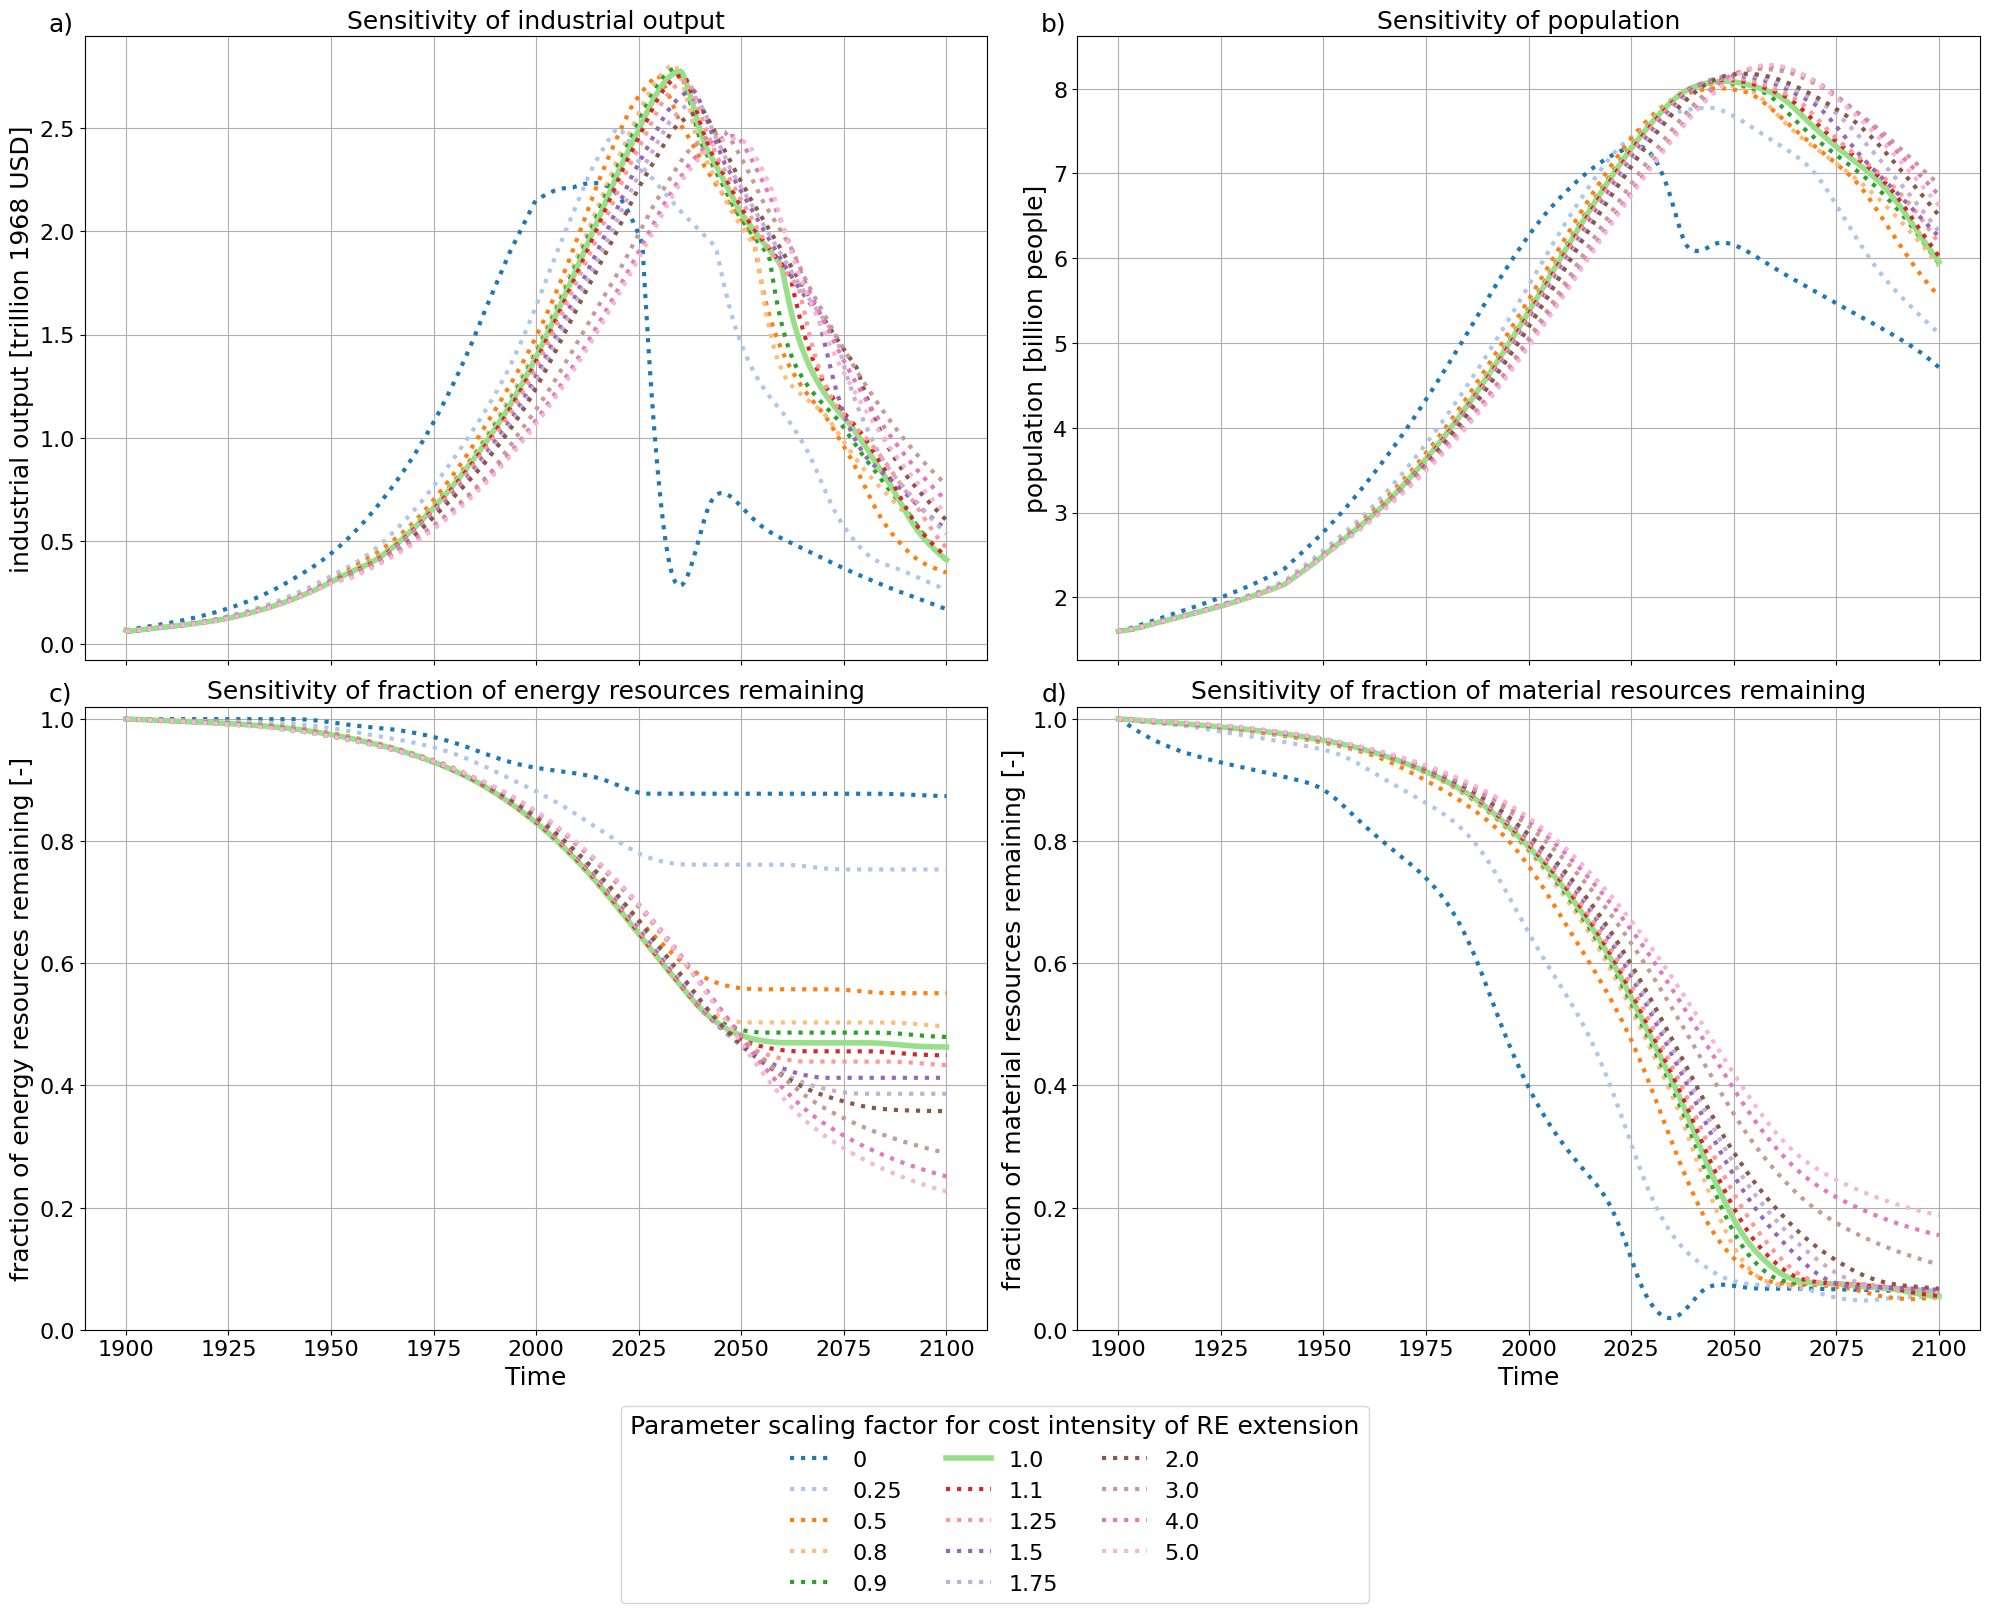

In [ ]:
# Plot for 4 variables for article (industrial output, population, fraction of energy resources remaining, fraction of material resources remaining)
variables = [
    'industrial output',
    'population',
    'fraction of energy resources remaining',
    'fraction of material resources remaining'
]

fig, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=True)
axes = axes.flatten()

# Scaling factors and unit labels
scale_div = {
    'population': 1e9,             # -> billions
    'industrial output': 1e12      # -> trillions
}
unit_suffix = {
    'population': ' [billion people]',
    'industrial output': ' [trillion 1968 USD]',
    'fraction of energy resources remaining': ' [-]',
    'fraction of material resources remaining': ' [-]'
}

letters = ['a)', 'b)', 'c)', 'd)']

# Extended colormap for distinct colors
cmap = plt.get_cmap("tab20")
colors = [cmap(i) for i in range(len(factors_for_sensitivity_analysis))]

# For one shared legend
handles, labels = [], []

# Plot
for ax, var in zip(axes, variables):
    for idx, factor in enumerate(factors_for_sensitivity_analysis):
        result = results_by_factor_cost[factor]
        series = result[var]

        # Apply scaling if needed
        if var in scale_div:
            series = series / scale_div[var]

        # Line style
        if factor == 1:
            line, = ax.plot(result.index, series,
                            label=f'factor = {factor}',
                            linewidth=4.0, color=colors[idx])
        else:
            line, = ax.plot(result.index, series,
                            label=f'factor = {factor}',
                            linestyle=':', linewidth=3.0, color=colors[idx])

        # Add only once to global legend
        if f'{factor}' not in labels:
            handles.append(line)
            labels.append(f'{factor}')

    # Titles and labels
    ax.set_title(f"Sensitivity of {var}", fontsize=fontsize_sensitivity)
    ax.set_ylabel(f"{var}{unit_suffix.get(var, '')}", fontsize=fontsize_sensitivity)
    ax.tick_params(axis="y", labelsize=fontsize_legend_sensitivity)
    ax.grid(True)

    # Panel label
    ax.text(-0.04, 1.04, letters[axes.tolist().index(ax)],
            transform=ax.transAxes, fontsize=fontsize_sensitivity,
            fontweight='light', va='top')

    # Clamp fractions
    if var.startswith('fraction of'):
        ax.set_ylim(0, 1.02)

# X-labels
for ax in axes[-2:]:
    ax.set_xlabel('Time', fontsize=fontsize_sensitivity)
    ax.tick_params(axis="x", labelsize=fontsize_legend_sensitivity)

# Shared legend below all plots
fig.legend(handles, labels,
           title="Parameter scaling factor for cost intensity of RE extension",
           loc="lower center", ncol=3,
           fontsize=fontsize_legend_sensitivity, title_fontsize=fontsize_sensitivity,
           bbox_to_anchor=(0.5, -0.08))

plt.tight_layout(rect=[0, 0.06, 1, 1])

plt.savefig(os.path.join(results_folder_path_figures, 'sensitivity_analysis_cost_intensity.pdf'), 
            dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(results_folder_path_figures, 'sensitivity_analysis_cost_intensity.eps'),
            dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
# --- CSV export: sensitivity analysis (cost intensity of RE extension) ---

variables = [
    'industrial output',
    'population',
    'fraction of energy resources remaining',
    'fraction of material resources remaining'
]

scale_div = {
    'population': 1e9,        # -> billions
    'industrial output': 1e12  # -> trillions
}

dfs_by_variable_cost_factor = {}

for var in variables:
    series_by_factor = {}

    for factor in factors_for_sensitivity_analysis:
        result = results_by_factor_cost[factor]
        if var in result.columns:
            s = result[var].copy()
            if var in scale_div:
                s = s / scale_div[var]

            # Spaltenname = scaling factor
            series_by_factor[str(factor)] = s

    df_var = pd.DataFrame(series_by_factor)
    df_var.index.name = "time"

    # optional: Spaltenreihenfolge exakt wie factors_for_sensitivity_analysis
    df_var = df_var.reindex(columns=[str(f) for f in factors_for_sensitivity_analysis])

    dfs_by_variable_cost_factor[var] = df_var

    # save as csv (one per variable/subplot)
    safe_name = var.replace(" ", "_").replace("/", "_")
    out_path = os.path.join(results_folder_path_csv, f"sensitivity_cost_intensity__{safe_name}.csv")
    df_var.to_csv(out_path)
    print("Saved:", out_path)

Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/sensitivity_cost_intensity__industrial_output.csv
Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/sensitivity_cost_intensity__population.csv
Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/sensitivity_cost_intensity__fraction_of_energy_resources_remaining.csv
Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/sensitivity_cost_intensity__fraction_of_material_resources_remaining.csv


## Energy intensitiy of Recycling

In [40]:
# Run the model once for each factor, store results for all variables
results_by_factor_energy = {}
for factor in factors_for_sensitivity_analysis:
    recycling_energy_consumption = recycling_energy_consumption_standard_value * factor
    results_by_factor_energy[factor] = full_model.run(
        params={'energy consumption by recycling reference': recycling_energy_consumption},
        return_columns=variables)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_lcoe_table_re
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_assimilation_half_life_mult_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_jobs_per_industrial_capital_unit_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_capacity_utilization_fraction_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Fram

In [41]:
#Plot with more variables
# variables = [
#     'RE capacity extension',
#     'actual share of RE',
#     'persistent pollution index',
#     'fraction of energy resources remaining',
#     'fraction of material resources remaining',
#     'fraction of industrial capital allocated to obtaining resources',
#     'industrial output',
#     'population',
#     'life expectancy']

# n_vars = len(variables)
# fig, axes = plt.subplots(5, 2, figsize=(20, 30), sharex=True)
# axes = axes.flatten()  

# # Now plot each variable for all factors
# for ax, var in zip(axes, variables):
#     for factor in factors_for_sensitivity_analysis:
#         result = results_by_factor_energy[factor]
#         if factor == 1:
#             ax.plot(result.index, result[var], label=f'Factor = {factor}', linewidth=4)
#         else:
#             ax.plot(result.index, result[var], label=f'Factor = {factor}', linestyle=':', linewidth=3)
#     ax.set_title(var)
#     ax.set_ylabel(var)
#     ax.grid(True)
#     ax.legend()
# plt.title('Sensitivity Analysis of Extendable 1 Stock Model with Varying Energy Consumption by Recycling')
# axes[-1].set_xlabel('Time')
# fig.delaxes(axes[-1])  # Remove the last empty subplot if not needed
# plt.tight_layout()
# plt.show()


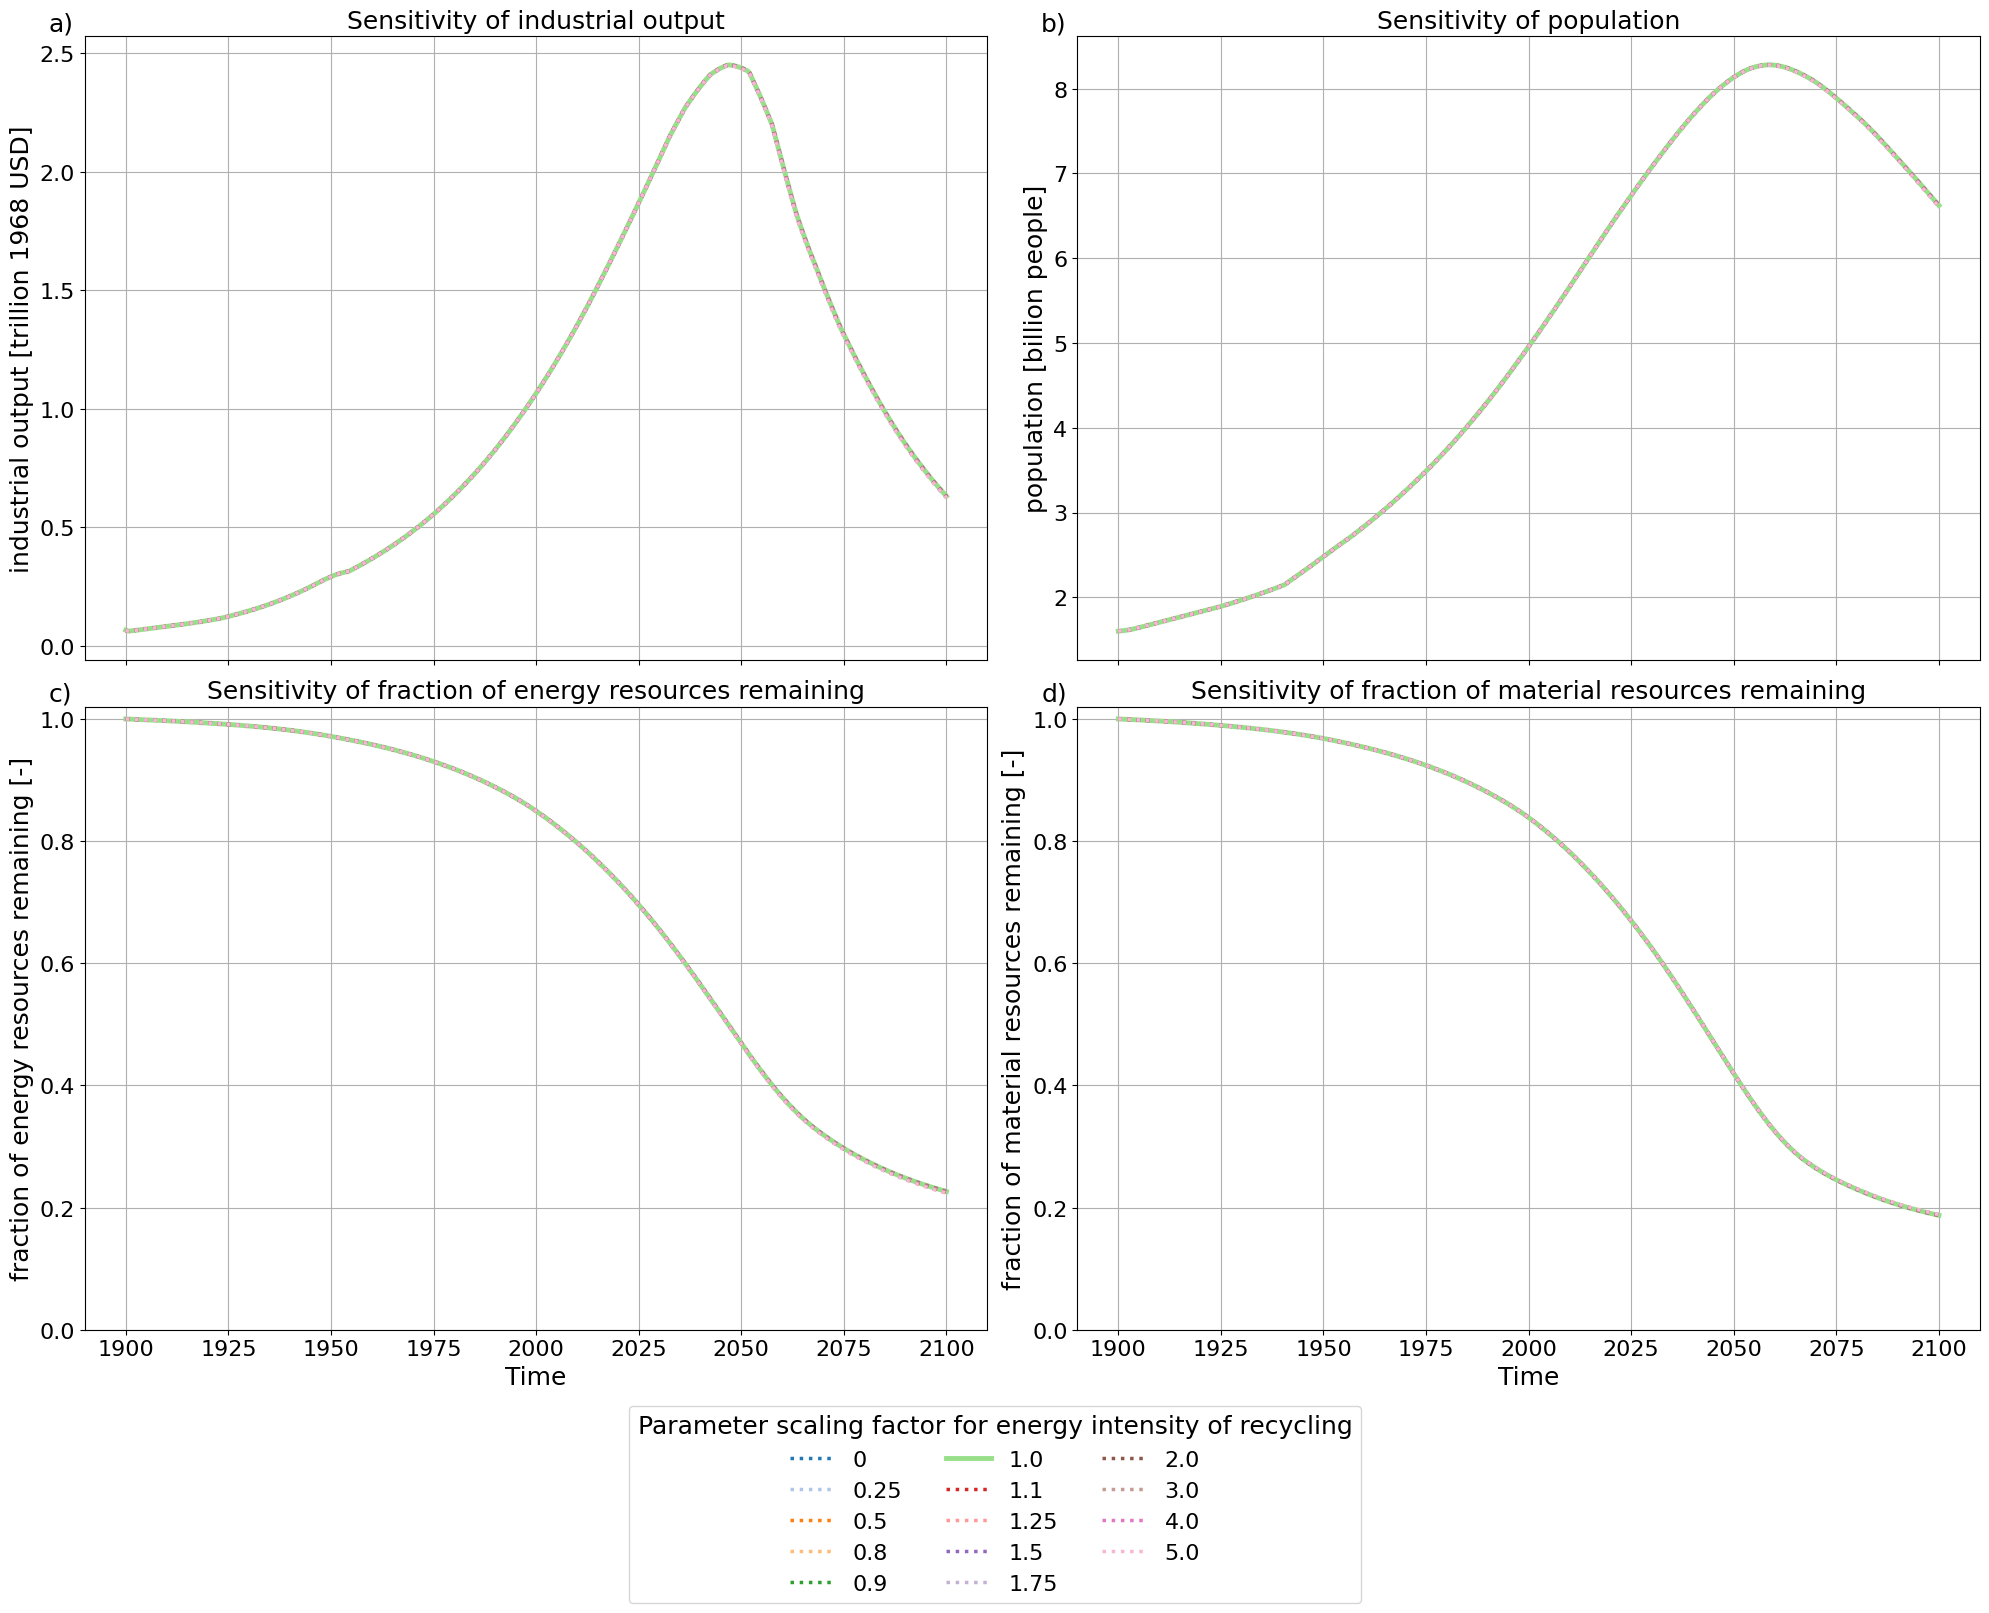

In [42]:
variables = [
    'industrial output',
    'population',
    'fraction of energy resources remaining',
    'fraction of material resources remaining'
]

fig, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=True)
axes = axes.flatten()

# Scaling factors and unit labels
scale_div = {
    'population': 1e9,             # -> billions
    'industrial output': 1e12      # -> trillions
}
unit_suffix = {
    'population': ' [billion people]',
    'industrial output': ' [trillion 1968 USD]',
    'fraction of energy resources remaining': ' [-]',
    'fraction of material resources remaining': ' [-]'
}

# Panel letters
letters = ['a)', 'b)', 'c)', 'd)']

# Extended colormap
cmap = plt.get_cmap("tab20")
colors = [cmap(i) for i in range(len(factors_for_sensitivity_analysis))]

# For shared legend
handles, labels = [], []

# Plot
for ax, var in zip(axes, variables):
    for idx, factor in enumerate(factors_for_sensitivity_analysis):
        result = results_by_factor_energy[factor]
        series = result[var]

        # Apply scaling
        if var in scale_div:
            series = series / scale_div[var]

        # Line style
        if factor == 1:
            line, = ax.plot(result.index, series,
                            label=f'factor = {factor}',
                            linewidth=3.5, color=colors[idx])
        else:
            line, = ax.plot(result.index, series,
                            label=f'factor = {factor}',
                            linestyle=':', linewidth=2.5, color=colors[idx])

        # Add to global legend only once
        if f'{factor}' not in labels:
            handles.append(line)
            labels.append(f'{factor}')

    # Title & labels
    ax.set_title(f"Sensitivity of {var}", fontsize=fontsize_sensitivity)
    ax.set_ylabel(f"{var}{unit_suffix.get(var, '')}", fontsize=fontsize_sensitivity)
    ax.tick_params(axis="y", labelsize=fontsize_legend_sensitivity)
    ax.grid(True)

    # Panel letter
    ax.text(-0.04, 1.04, letters[axes.tolist().index(ax)],
            transform=ax.transAxes, fontsize=fontsize_sensitivity, fontweight='light', va='top')

    # Clamp fractions
    if var.startswith('fraction of'):
        ax.set_ylim(0, 1.02)

# X-axis labels
for ax in axes[-2:]:
    ax.set_xlabel('Time', fontsize=fontsize_sensitivity)
    ax.tick_params(axis="x", labelsize=fontsize_legend_sensitivity)

# Shared legend below everything
fig.legend(handles, labels,
           title="Parameter scaling factor for energy intensity of recycling",
           loc="lower center",
           ncol=3,
           fontsize=fontsize_legend_sensitivity,
           title_fontsize=fontsize_sensitivity,
           bbox_to_anchor=(0.5, -0.08))

# Leave room at bottom
plt.tight_layout(rect=[0, 0.06, 1, 1])

plt.savefig(os.path.join(results_folder_path_figures, 'sensitivity_analysis_energy_intensity_recycling.pdf'),
            dpi=300, bbox_inches="tight")
# plt.savefig(os.path.join(results_folder_path, 'sensitivity_analysis_energy_intensity_recycling.eps'),
#             dpi=300, bbox_inches="tight") 
plt.show()

# Combination of the three sensitivity parameters

In [43]:
variables = [
    'RE capacity extension',
    'actual share of RE',
    'persistent pollution index',
    'fraction of energy resources remaining',
    'fraction of material resources remaining',
    'fraction of industrial capital allocated to obtaining resources',
    'industrial output',
    'population',
    'life expectancy']
selected_triples = [
    (1, 1, 1),    # baseline
    (0, 0, 0),    # all minimum
    (0.2, 0.2, 0.2),  # all low
    (2, 2, 2),    # all double
    (5, 5, 5),    # all maximum

    # single factor variations (high)
    (5, 1, 1),    # high material
    (1, 5, 1),    # high cost
    (1, 1, 5),    # high recycling

    # single factor variations (low)
    (0.2, 1, 1),  # low material
    (1, 0.2, 1),  # low cost
    (1, 1, 0.2),  # low recycling

    # mixed extremes
    (2, 5, 0.2),
    (0.2, 2, 5),
    (5, 0.2, 2)
]


results_by_triple = {}

for mat_factor, cost_factor, rec_factor in selected_triples:
    material_intensity = material_intensity_standard_value * mat_factor
    integration_cost = re_integration_cost_factor_standard_value * cost_factor
    recycling_energy_consumption = recycling_energy_consumption_standard_value * rec_factor

    result = full_model.run(
        params={
            'RE extension material intensity': material_intensity,
            'RE integration cost factor': integration_cost,
            'energy consumption by recycling reference': recycling_energy_consumption
        },
        return_columns=variables
    )
    results_by_triple[(mat_factor, cost_factor, rec_factor)] = result

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_lcoe_table_re
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_assimilation_half_life_mult_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_jobs_per_industrial_capital_unit_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pysd/py_backend/lookups.py:108: UserWarning: _hardcodedlookup_capacity_utilization_fraction_table
extrapolating data below the minimum value of the series
  warnings.warn(
/Library/Fram

/var/folders/wb/x4l7dt7n5t52cnzrw_djzf1w0000gn/T/ipykernel_3745/2095749513.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


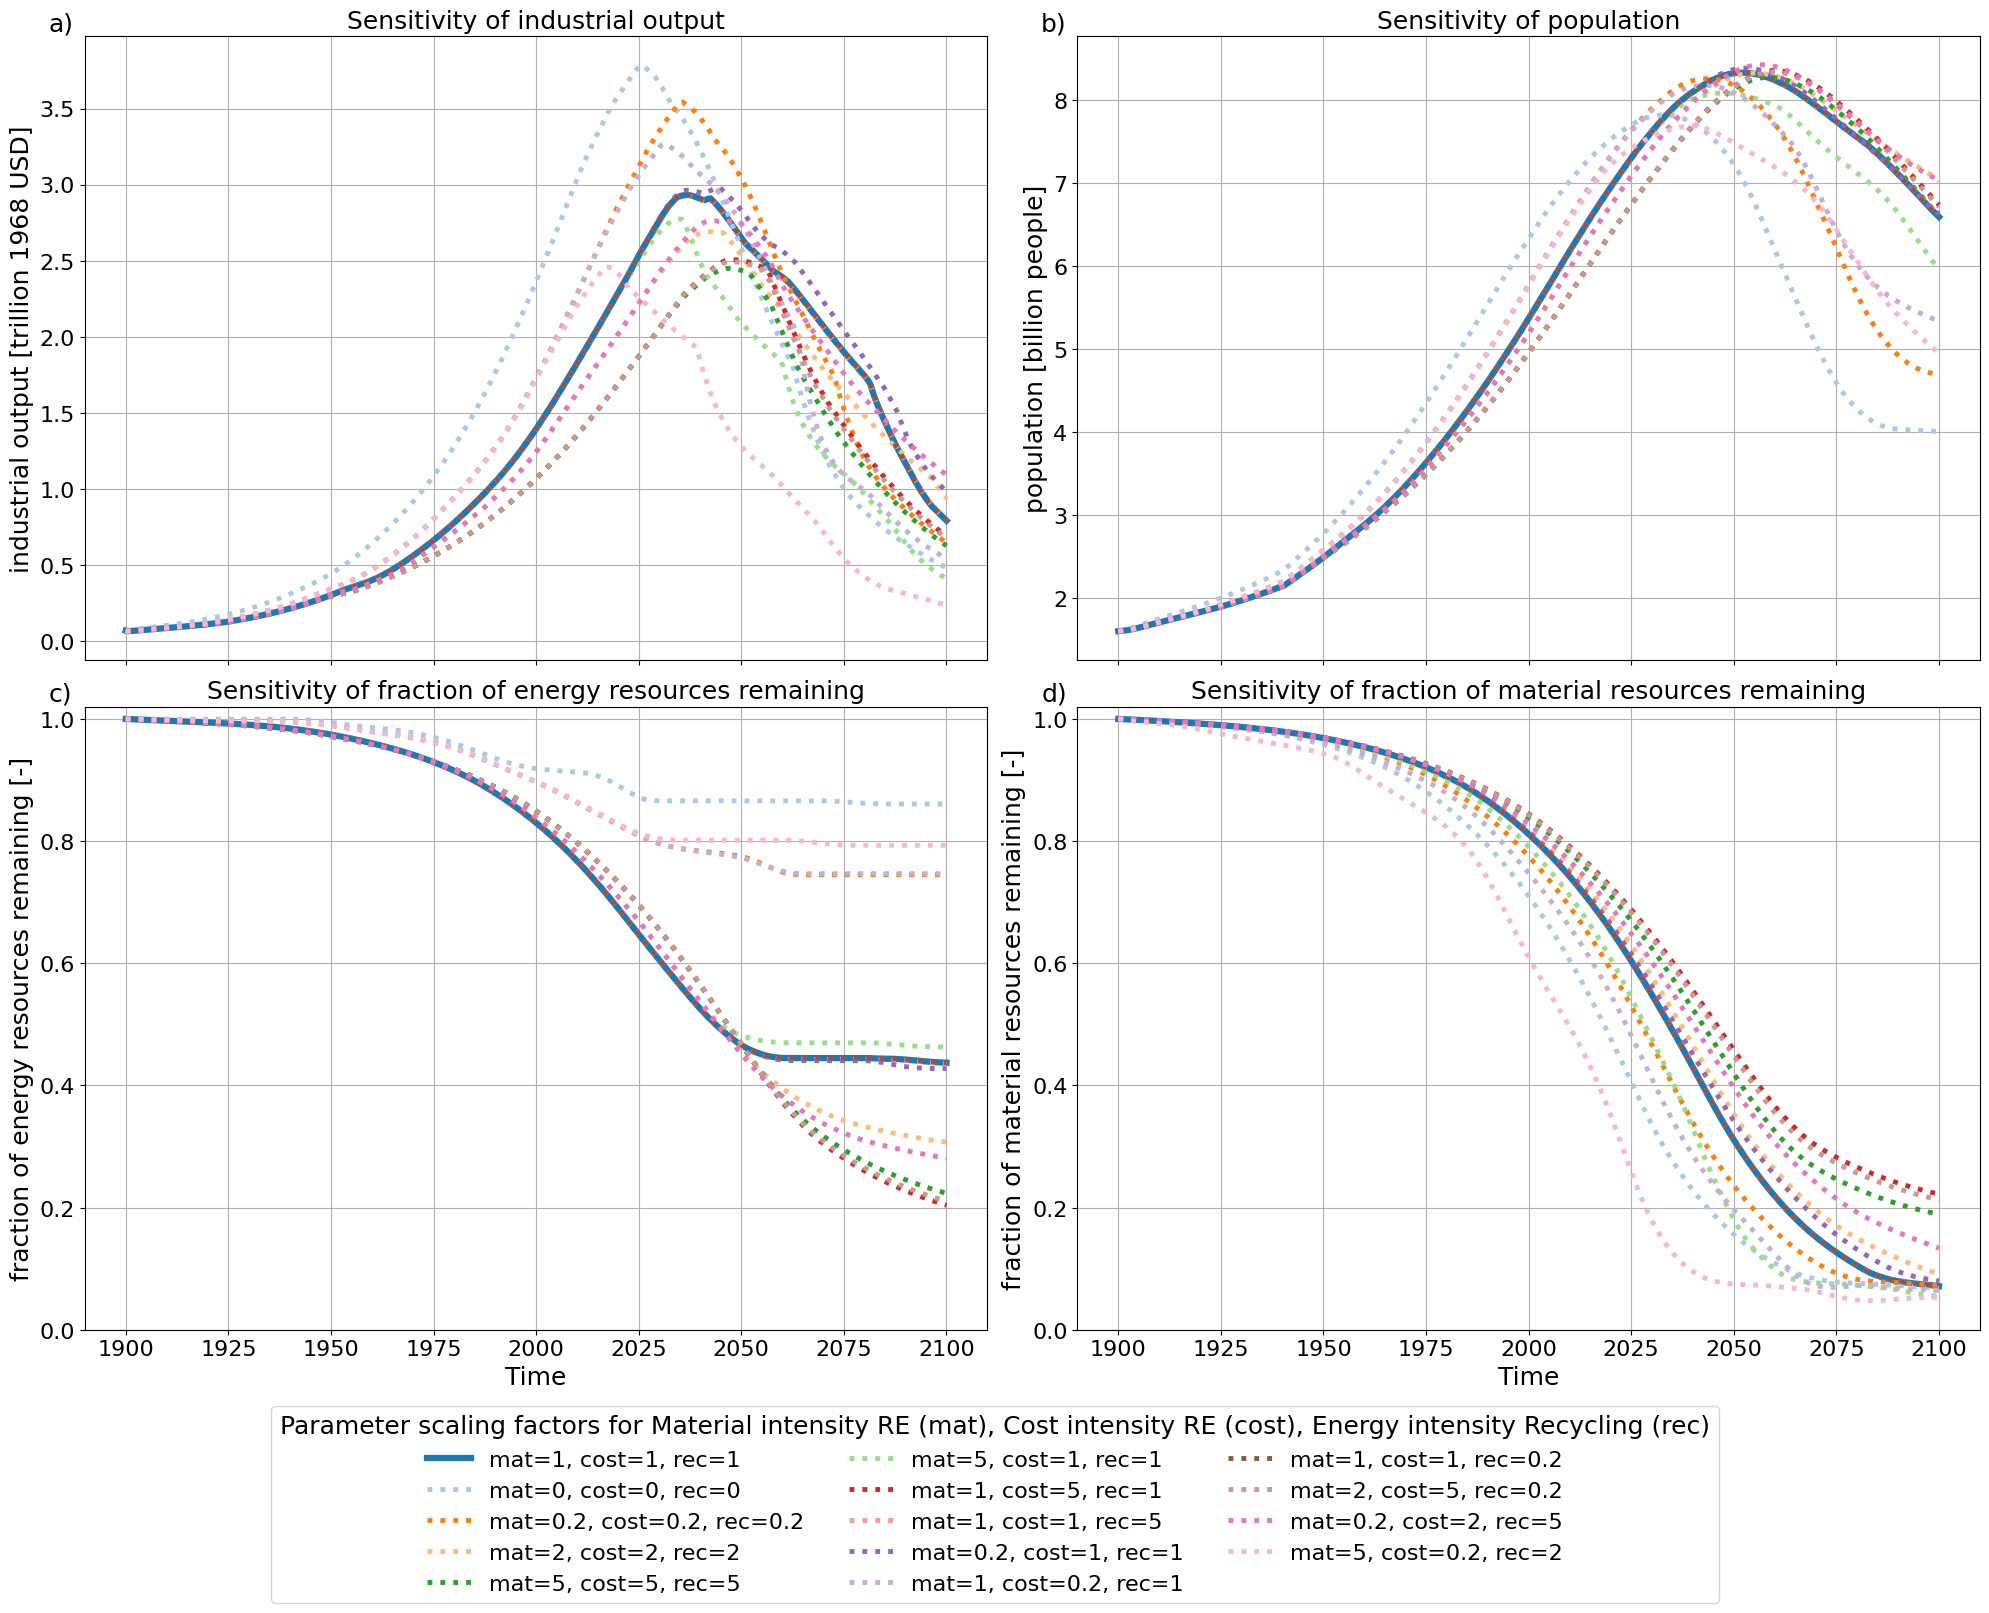

In [ ]:
variables = [
    'industrial output',
    'population',
    'fraction of energy resources remaining',
    'fraction of material resources remaining'
]

fig, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=True)
#fig.suptitle(
#    '\nSensitivity analysis of CE & ET model: Material intensity of RE, Cost intensity of RE, Energy intensity of recycling',
#    fontsize=20, y=1.01
#)
axes = axes.flatten()

# Scaling for readability + units (sentence case, brackets)
scale_div = {
    'population': 1e9,             # -> billions
    'industrial output': 1e12      # -> trillions
}
unit_suffix = {
    'population': ' [billion people]',
    'industrial output': ' [trillion 1968 USD]',
    'fraction of energy resources remaining': ' [-]',
    'fraction of material resources remaining': ' [-]'
}

# Panel letters
panel_letters = ['a)', 'b)', 'c)', 'd)']

# Color mapping for distinct (mat, cost, rec) triples using tab20
triples = list(results_by_triple.keys())  # expect tuples like (mat, cost, rec)

cmap = get_cmap('tab20')
colors = {trp: cmap(i % 20) for i, trp in enumerate(triples)}

# Line style/width: baseline solid thicker; others dotted thinner
BASELINE = (1, 1, 1)
base_lw = 4.5
base_ls = '-'
oth_lw  = 3.5
oth_ls  = ':'

handles, labels = [], []

for ax, var in zip(axes, variables):
    for trp in triples:
        result = results_by_triple[trp]
        if var not in result.columns:
            continue
        series = result[var]
        if var in scale_div:
            series = series / scale_div[var]

        lw = base_lw if trp == BASELINE else oth_lw
        ls = base_ls if trp == BASELINE else oth_ls
        color = colors[trp]

        line, = ax.plot(
            result.index, series,
            linewidth=lw, linestyle=ls, color=color,
            label=f'mat={trp[0]}, cost={trp[1]}, rec={trp[2]}'
        )

        # Collect one handle per unique triple for the figure legend
        # (only once, on the first subplot)
        if ax is axes[0]:
            handles.append(line)
            labels.append(line.get_label())

    # Titles & labels in sentence case
    ax.set_title(f"Sensitivity of {var}", fontsize=fontsize_sensitivity)
    ax.set_ylabel(f"{var}{unit_suffix.get(var, '')}", fontsize=fontsize_sensitivity)
    ax.grid(True)

    # Clamp fractions to [0, 1.02]
    if var.startswith('fraction of'):
        ax.set_ylim(0, 1.02)

    # Panel letter
    idx = axes.tolist().index(ax)
    ax.text(-0.04, 1.04, panel_letters[idx],
            transform=ax.transAxes, fontsize=fontsize_sensitivity, fontweight='light', va='top')

    ax.tick_params(axis="y",labelsize=fontsize_legend_sensitivity)


# X-axis labels (sentence case)
for ax in axes[-2:]:
    ax.set_xlabel('Time', fontsize=fontsize_sensitivity)
    ax.tick_params(axis="x",labelsize=fontsize_legend_sensitivity)


# Single legend below all plots (sentence case title)
fig.legend(
    handles, labels,
    title="Parameter scaling factors for Material intensity RE (mat), Cost intensity RE (cost), Energy intensity Recycling (rec)",
    loc="lower center", ncol=3, fontsize=fontsize_legend_sensitivity, title_fontsize=fontsize_sensitivity,
    bbox_to_anchor=(0.5, -0.08)
)

plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.savefig(os.path.join(results_folder_path_figures, "Figure9_sensitivity_analysis_triples.pdf"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(results_folder_path_figures, "Figure9_sensitivity_analysis_triples.eps"), dpi=300, bbox_inches="tight")
plt.show()

In [53]:
# Variables used in the 2x2 subplot layout
variables = [
    'industrial output',
    'population',
    'fraction of energy resources remaining',
    'fraction of material resources remaining'
]
subplotletters = {var: letter for var, letter in zip(variables, ['a', 'b', 'c', 'd'])}
# Scaling dictionary used in the plotting code (applied for readability)
scale_div = {
    'population': 1e9,             # -> billions
    'industrial output': 1e12      # -> trillions
}

# Triples are the keys in results_by_triple, each expected as (mat, cost, rec)
triples = list(results_by_triple.keys())

# Helper to produce a safe column name for each triple (matches plot labels)
def triple_colname(trp):
    return f"mat={trp[0]}_cost={trp[1]}_rec={trp[2]}"

# Dictionary to store DataFrames by variable if you want to use them later in Python
dfs_by_variable_triple = {}

for var in variables:
    series_by_triple = {}

    for trp in triples:
        result = results_by_triple[trp]
        # skip triples that don't contain the variable
        if var not in result.columns:
            continue

        s = result[var].copy()

        # apply scaling if appropriate
        if var in scale_div:
            s = s / scale_div[var]

        colname = triple_colname(trp)
        series_by_triple[colname] = s

    # Build DataFrame for this variable (columns align by time index)
    if not series_by_triple:
        df_var = pd.DataFrame()  # empty DataFrame if no data found
    else:
        df_var = pd.DataFrame(series_by_triple)
        # Reorder columns to match the original triples order
        desired_cols = [triple_colname(t) for t in triples if triple_colname(t) in df_var.columns]
        df_var = df_var.reindex(columns=desired_cols)

    # Name the index 'time' for clarity
    df_var.index.name = "time"

    # Store in dict for later access in the session
    dfs_by_variable_triple[var] = df_var

    # Safe filename for this variable
    safe_name = "figure_9" + subplotletters[var] 
    out_path = os.path.join(results_folder_path_csv, f"{safe_name}.csv")

    # Save CSV (this will write an empty file if df_var is empty)
    df_var.to_csv(out_path)
    print("Saved:", out_path)

Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/figure_9a.csv
Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/figure_9b.csv
Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/figure_9c.csv
Saved: /Users/richardgonnheimer/Masterprojekt Vensim/results/csv/figure_9d.csv
